In [48]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt


filename = 'winequality-white.csv'
path = 'C:\Users\User\Documents\Training Assignments\Linear Regression'

### read the dataset into a DataFrame object called df
df = pd.read_csv(os.path.join(path, filename),sep=';')


###shuffle and split the data into training and testing sets
df_train = df.sample(frac=0.8,random_state=7)
df_test = df.drop(df_train.index)

#df.head()


In [49]:
###separate output labels from the dataset
train_data_y = df_train['quality']
train_data_x = df_train.drop('quality',axis=1)

test_data_y = df_test['quality']
test_data_x = df_test.drop('quality',axis=1)




In [50]:
###normalize the datasets on the mean and standard deviation of the training set
mean_value = train_data_x.mean(axis=0)
std_value = train_data_x.std(axis=0)

train_data_x = (train_data_x - mean_value)/std_value

test_data_x = (test_data_x - mean_value)/std_value



In [51]:
###convert into numpy arrays and add bias units
train_data_x = train_data_x.values
train_data_y = train_data_y.values.reshape(train_data_y.size,1)

test_data_x = test_data_x.values
test_data_y = test_data_y.values.reshape(test_data_y.size,1)


train_data_x = np.insert(train_data_x, 0, [1],axis=1)

test_data_x = np.insert(test_data_x, 0, [1],axis=1)

np.random.seed(42)
parameters = np.random.randn(12,1)

X = train_data_x
Y = train_data_y
X_test = test_data_x
Y_test = test_data_y



In [52]:
def cost_calculation(X,Y,parameters):
    ##function takes in X, Y and parameters and calculates the loss and cost functions    
    loss = np.dot(X, parameters) - Y
    
    cost = np.sum(np.power(loss,2),axis=0)/(2*len(X))
    
    return loss, cost



def gradient_calculation(X,Y,parameters,alpha):
    ###this function performs gradient descent on the parameters and stops the descent when the difference reaches a threshold
    diff = 1
    cost_list=[]
    
    #while  diff > 0.0001: 
    while diff <50001:
        loss, cost_before = cost_calculation(X,Y,parameters)

        gradient = np.multiply(loss,X)
    
        parameters = parameters - (alpha/len(X))*gradient.sum(axis=0).reshape(len(parameters),1)
            
        loss, cost_after = cost_calculation(X,Y,parameters)
        
        cost_list.append(cost_after)
        
        cost_diff = cost_before-cost_after
        print cost_diff
        diff+=1
        
    return parameters, cost_list


alpha=0.0003
parameters,cost_list = gradient_calculation(X,Y,parameters,alpha) 
num_of_iter = list(range(50000))
print parameters


[0.01225399]
[0.01224368]
[0.01223339]
[0.01222311]
[0.01221284]
[0.01220258]
[0.01219233]
[0.01218209]
[0.01217187]
[0.01216166]
[0.01215146]
[0.01214127]
[0.01213109]
[0.01212093]
[0.01211078]
[0.01210063]
[0.0120905]
[0.01208039]
[0.01207028]
[0.01206019]
[0.0120501]
[0.01204003]
[0.01202997]
[0.01201992]
[0.01200989]
[0.01199986]
[0.01198985]
[0.01197984]
[0.01196985]
[0.01195987]
[0.01194991]
[0.01193995]
[0.01193]
[0.01192007]
[0.01191015]
[0.01190024]
[0.01189034]
[0.01188045]
[0.01187057]
[0.01186071]
[0.01185085]
[0.01184101]
[0.01183118]
[0.01182135]
[0.01181155]
[0.01180175]
[0.01179196]
[0.01178218]
[0.01177242]
[0.01176266]
[0.01175292]
[0.01174319]
[0.01173347]
[0.01172376]
[0.01171406]
[0.01170437]
[0.0116947]
[0.01168503]
[0.01167538]
[0.01166573]
[0.0116561]
[0.01164648]
[0.01163687]
[0.01162727]
[0.01161768]
[0.0116081]
[0.01159853]
[0.01158897]
[0.01157943]
[0.01156989]
[0.01156037]
[0.01155085]
[0.01154135]
[0.01153186]
[0.01152238]
[0.01151291]
[0.01150345]
[0.0114

[0.00691228]
[0.00690746]
[0.00690266]
[0.00689785]
[0.00689305]
[0.00688825]
[0.00688346]
[0.00687867]
[0.00687389]
[0.00686911]
[0.00686434]
[0.00685956]
[0.0068548]
[0.00685004]
[0.00684528]
[0.00684052]
[0.00683577]
[0.00683103]
[0.00682628]
[0.00682155]
[0.00681681]
[0.00681208]
[0.00680736]
[0.00680264]
[0.00679792]
[0.00679321]
[0.0067885]
[0.00678379]
[0.00677909]
[0.0067744]
[0.00676971]
[0.00676502]
[0.00676033]
[0.00675565]
[0.00675098]
[0.0067463]
[0.00674164]
[0.00673697]
[0.00673231]
[0.00672766]
[0.00672301]
[0.00671836]
[0.00671371]
[0.00670907]
[0.00670444]
[0.00669981]
[0.00669518]
[0.00669056]
[0.00668594]
[0.00668132]
[0.00667671]
[0.0066721]
[0.0066675]
[0.0066629]
[0.0066583]
[0.00665371]
[0.00664913]
[0.00664454]
[0.00663996]
[0.00663539]
[0.00663082]
[0.00662625]
[0.00662168]
[0.00661712]
[0.00661257]
[0.00660802]
[0.00660347]
[0.00659892]
[0.00659438]
[0.00658985]
[0.00658531]
[0.00658079]
[0.00657626]
[0.00657174]
[0.00656722]
[0.00656271]
[0.0065582]
[0.00655

[0.00425267]
[0.00424999]
[0.0042473]
[0.00424462]
[0.00424194]
[0.00423926]
[0.00423658]
[0.0042339]
[0.00423123]
[0.00422856]
[0.00422589]
[0.00422322]
[0.00422055]
[0.00421789]
[0.00421523]
[0.00421257]
[0.00420991]
[0.00420725]
[0.0042046]
[0.00420194]
[0.00419929]
[0.00419664]
[0.00419399]
[0.00419135]
[0.00418871]
[0.00418606]
[0.00418343]
[0.00418079]
[0.00417815]
[0.00417552]
[0.00417289]
[0.00417026]
[0.00416763]
[0.004165]
[0.00416238]
[0.00415975]
[0.00415713]
[0.00415451]
[0.0041519]
[0.00414928]
[0.00414667]
[0.00414406]
[0.00414145]
[0.00413884]
[0.00413623]
[0.00413363]
[0.00413103]
[0.00412843]
[0.00412583]
[0.00412323]
[0.00412064]
[0.00411805]
[0.00411545]
[0.00411287]
[0.00411028]
[0.00410769]
[0.00410511]
[0.00410253]
[0.00409995]
[0.00409737]
[0.00409479]
[0.00409222]
[0.00408965]
[0.00408707]
[0.00408451]
[0.00408194]
[0.00407937]
[0.00407681]
[0.00407425]
[0.00407169]
[0.00406913]
[0.00406657]
[0.00406402]
[0.00406147]
[0.00405892]
[0.00405637]
[0.00405382]
[0.00

[0.00266306]
[0.00266146]
[0.00265985]
[0.00265825]
[0.00265664]
[0.00265504]
[0.00265344]
[0.00265184]
[0.00265024]
[0.00264864]
[0.00264704]
[0.00264544]
[0.00264385]
[0.00264225]
[0.00264066]
[0.00263907]
[0.00263748]
[0.00263589]
[0.0026343]
[0.00263271]
[0.00263112]
[0.00262954]
[0.00262795]
[0.00262637]
[0.00262478]
[0.0026232]
[0.00262162]
[0.00262004]
[0.00261846]
[0.00261688]
[0.00261531]
[0.00261373]
[0.00261215]
[0.00261058]
[0.00260901]
[0.00260744]
[0.00260586]
[0.00260429]
[0.00260273]
[0.00260116]
[0.00259959]
[0.00259802]
[0.00259646]
[0.0025949]
[0.00259333]
[0.00259177]
[0.00259021]
[0.00258865]
[0.00258709]
[0.00258553]
[0.00258397]
[0.00258242]
[0.00258086]
[0.00257931]
[0.00257776]
[0.0025762]
[0.00257465]
[0.0025731]
[0.00257155]
[0.00257001]
[0.00256846]
[0.00256691]
[0.00256537]
[0.00256382]
[0.00256228]
[0.00256074]
[0.0025592]
[0.00255766]
[0.00255612]
[0.00255458]
[0.00255304]
[0.00255151]
[0.00254997]
[0.00254844]
[0.0025469]
[0.00254537]
[0.00254384]
[0.002

[0.0017068]
[0.0017058]
[0.00170479]
[0.00170378]
[0.00170278]
[0.00170177]
[0.00170077]
[0.00169976]
[0.00169876]
[0.00169776]
[0.00169676]
[0.00169575]
[0.00169475]
[0.00169375]
[0.00169275]
[0.00169176]
[0.00169076]
[0.00168976]
[0.00168876]
[0.00168777]
[0.00168677]
[0.00168577]
[0.00168478]
[0.00168379]
[0.00168279]
[0.0016818]
[0.00168081]
[0.00167981]
[0.00167882]
[0.00167783]
[0.00167684]
[0.00167585]
[0.00167487]
[0.00167388]
[0.00167289]
[0.0016719]
[0.00167092]
[0.00166993]
[0.00166895]
[0.00166796]
[0.00166698]
[0.00166599]
[0.00166501]
[0.00166403]
[0.00166305]
[0.00166207]
[0.00166109]
[0.00166011]
[0.00165913]
[0.00165815]
[0.00165717]
[0.0016562]
[0.00165522]
[0.00165424]
[0.00165327]
[0.00165229]
[0.00165132]
[0.00165034]
[0.00164937]
[0.0016484]
[0.00164743]
[0.00164646]
[0.00164549]
[0.00164452]
[0.00164355]
[0.00164258]
[0.00164161]
[0.00164064]
[0.00163967]
[0.00163871]
[0.00163774]
[0.00163678]
[0.00163581]
[0.00163485]
[0.00163388]
[0.00163292]
[0.00163196]
[0.00

[0.00110978]
[0.00110914]
[0.00110849]
[0.00110785]
[0.0011072]
[0.00110656]
[0.00110591]
[0.00110527]
[0.00110462]
[0.00110398]
[0.00110334]
[0.00110269]
[0.00110205]
[0.00110141]
[0.00110077]
[0.00110013]
[0.00109948]
[0.00109884]
[0.0010982]
[0.00109756]
[0.00109692]
[0.00109629]
[0.00109565]
[0.00109501]
[0.00109437]
[0.00109373]
[0.0010931]
[0.00109246]
[0.00109182]
[0.00109119]
[0.00109055]
[0.00108992]
[0.00108928]
[0.00108865]
[0.00108801]
[0.00108738]
[0.00108675]
[0.00108611]
[0.00108548]
[0.00108485]
[0.00108422]
[0.00108359]
[0.00108296]
[0.00108233]
[0.00108169]
[0.00108106]
[0.00108044]
[0.00107981]
[0.00107918]
[0.00107855]
[0.00107792]
[0.00107729]
[0.00107667]
[0.00107604]
[0.00107541]
[0.00107479]
[0.00107416]
[0.00107354]
[0.00107291]
[0.00107229]
[0.00107166]
[0.00107104]
[0.00107041]
[0.00106979]
[0.00106917]
[0.00106855]
[0.00106792]
[0.0010673]
[0.00106668]
[0.00106606]
[0.00106544]
[0.00106482]
[0.0010642]
[0.00106358]
[0.00106296]
[0.00106234]
[0.00106172]
[0.0

[0.00073869]
[0.00073826]
[0.00073784]
[0.00073741]
[0.00073699]
[0.00073656]
[0.00073614]
[0.00073571]
[0.00073529]
[0.00073486]
[0.00073444]
[0.00073402]
[0.00073359]
[0.00073317]
[0.00073275]
[0.00073232]
[0.0007319]
[0.00073148]
[0.00073106]
[0.00073064]
[0.00073022]
[0.00072979]
[0.00072937]
[0.00072895]
[0.00072853]
[0.00072811]
[0.00072769]
[0.00072727]
[0.00072685]
[0.00072644]
[0.00072602]
[0.0007256]
[0.00072518]
[0.00072476]
[0.00072434]
[0.00072393]
[0.00072351]
[0.00072309]
[0.00072268]
[0.00072226]
[0.00072184]
[0.00072143]
[0.00072101]
[0.0007206]
[0.00072018]
[0.00071976]
[0.00071935]
[0.00071894]
[0.00071852]
[0.00071811]
[0.00071769]
[0.00071728]
[0.00071687]
[0.00071645]
[0.00071604]
[0.00071563]
[0.00071522]
[0.0007148]
[0.00071439]
[0.00071398]
[0.00071357]
[0.00071316]
[0.00071275]
[0.00071234]
[0.00071192]
[0.00071151]
[0.0007111]
[0.00071069]
[0.00071029]
[0.00070988]
[0.00070947]
[0.00070906]
[0.00070865]
[0.00070824]
[0.00070783]
[0.00070743]
[0.00070702]
[0.0

[0.00048812]
[0.00048785]
[0.00048757]
[0.00048729]
[0.00048701]
[0.00048673]
[0.00048646]
[0.00048618]
[0.0004859]
[0.00048562]
[0.00048535]
[0.00048507]
[0.00048479]
[0.00048452]
[0.00048424]
[0.00048396]
[0.00048369]
[0.00048341]
[0.00048314]
[0.00048286]
[0.00048259]
[0.00048231]
[0.00048204]
[0.00048176]
[0.00048149]
[0.00048121]
[0.00048094]
[0.00048066]
[0.00048039]
[0.00048011]
[0.00047984]
[0.00047957]
[0.00047929]
[0.00047902]
[0.00047875]
[0.00047847]
[0.0004782]
[0.00047793]
[0.00047766]
[0.00047738]
[0.00047711]
[0.00047684]
[0.00047657]
[0.0004763]
[0.00047602]
[0.00047575]
[0.00047548]
[0.00047521]
[0.00047494]
[0.00047467]
[0.0004744]
[0.00047413]
[0.00047386]
[0.00047359]
[0.00047332]
[0.00047305]
[0.00047278]
[0.00047251]
[0.00047224]
[0.00047197]
[0.0004717]
[0.00047143]
[0.00047116]
[0.0004709]
[0.00047063]
[0.00047036]
[0.00047009]
[0.00046982]
[0.00046956]
[0.00046929]
[0.00046902]
[0.00046875]
[0.00046849]
[0.00046822]
[0.00046795]
[0.00046769]
[0.00046742]
[0.00

[0.00033167]
[0.00033148]
[0.00033129]
[0.00033111]
[0.00033092]
[0.00033073]
[0.00033055]
[0.00033036]
[0.00033017]
[0.00032999]
[0.0003298]
[0.00032961]
[0.00032943]
[0.00032924]
[0.00032906]
[0.00032887]
[0.00032869]
[0.0003285]
[0.00032832]
[0.00032813]
[0.00032795]
[0.00032776]
[0.00032758]
[0.00032739]
[0.00032721]
[0.00032702]
[0.00032684]
[0.00032665]
[0.00032647]
[0.00032629]
[0.0003261]
[0.00032592]
[0.00032573]
[0.00032555]
[0.00032537]
[0.00032518]
[0.000325]
[0.00032482]
[0.00032463]
[0.00032445]
[0.00032427]
[0.00032409]
[0.0003239]
[0.00032372]
[0.00032354]
[0.00032336]
[0.00032317]
[0.00032299]
[0.00032281]
[0.00032263]
[0.00032245]
[0.00032226]
[0.00032208]
[0.0003219]
[0.00032172]
[0.00032154]
[0.00032136]
[0.00032118]
[0.000321]
[0.00032082]
[0.00032063]
[0.00032045]
[0.00032027]
[0.00032009]
[0.00031991]
[0.00031973]
[0.00031955]
[0.00031937]
[0.00031919]
[0.00031901]
[0.00031883]
[0.00031865]
[0.00031847]
[0.00031829]
[0.00031812]
[0.00031794]
[0.00031776]
[0.00031

[0.00022245]
[0.00022233]
[0.00022221]
[0.00022208]
[0.00022196]
[0.00022184]
[0.00022171]
[0.00022159]
[0.00022147]
[0.00022134]
[0.00022122]
[0.0002211]
[0.00022098]
[0.00022085]
[0.00022073]
[0.00022061]
[0.00022048]
[0.00022036]
[0.00022024]
[0.00022012]
[0.00022]
[0.00021987]
[0.00021975]
[0.00021963]
[0.00021951]
[0.00021938]
[0.00021926]
[0.00021914]
[0.00021902]
[0.0002189]
[0.00021878]
[0.00021865]
[0.00021853]
[0.00021841]
[0.00021829]
[0.00021817]
[0.00021805]
[0.00021793]
[0.00021781]
[0.00021768]
[0.00021756]
[0.00021744]
[0.00021732]
[0.0002172]
[0.00021708]
[0.00021696]
[0.00021684]
[0.00021672]
[0.0002166]
[0.00021648]
[0.00021636]
[0.00021624]
[0.00021612]
[0.000216]
[0.00021588]
[0.00021576]
[0.00021564]
[0.00021552]
[0.0002154]
[0.00021528]
[0.00021516]
[0.00021504]
[0.00021492]
[0.0002148]
[0.00021468]
[0.00021456]
[0.00021444]
[0.00021433]
[0.00021421]
[0.00021409]
[0.00021397]
[0.00021385]
[0.00021373]
[0.00021361]
[0.00021349]
[0.00021338]
[0.00021326]
[0.0002131

[0.0001508]
[0.00015072]
[0.00015064]
[0.00015055]
[0.00015047]
[0.00015039]
[0.00015031]
[0.00015023]
[0.00015014]
[0.00015006]
[0.00014998]
[0.0001499]
[0.00014982]
[0.00014973]
[0.00014965]
[0.00014957]
[0.00014949]
[0.00014941]
[0.00014932]
[0.00014924]
[0.00014916]
[0.00014908]
[0.000149]
[0.00014892]
[0.00014884]
[0.00014875]
[0.00014867]
[0.00014859]
[0.00014851]
[0.00014843]
[0.00014835]
[0.00014827]
[0.00014819]
[0.00014811]
[0.00014803]
[0.00014794]
[0.00014786]
[0.00014778]
[0.0001477]
[0.00014762]
[0.00014754]
[0.00014746]
[0.00014738]
[0.0001473]
[0.00014722]
[0.00014714]
[0.00014706]
[0.00014698]
[0.0001469]
[0.00014682]
[0.00014674]
[0.00014666]
[0.00014658]
[0.0001465]
[0.00014642]
[0.00014634]
[0.00014626]
[0.00014618]
[0.0001461]
[0.00014602]
[0.00014594]
[0.00014586]
[0.00014578]
[0.0001457]
[0.00014562]
[0.00014554]
[0.00014546]
[0.00014538]
[0.0001453]
[0.00014522]
[0.00014515]
[0.00014507]
[0.00014499]
[0.00014491]
[0.00014483]
[0.00014475]
[0.00014467]
[0.0001445

[0.00010215]
[0.00010209]
[0.00010204]
[0.00010198]
[0.00010193]
[0.00010188]
[0.00010182]
[0.00010177]
[0.00010171]
[0.00010166]
[0.0001016]
[0.00010155]
[0.0001015]
[0.00010144]
[0.00010139]
[0.00010133]
[0.00010128]
[0.00010122]
[0.00010117]
[0.00010112]
[0.00010106]
[0.00010101]
[0.00010095]
[0.0001009]
[0.00010085]
[0.00010079]
[0.00010074]
[0.00010068]
[0.00010063]
[0.00010058]
[0.00010052]
[0.00010047]
[0.00010042]
[0.00010036]
[0.00010031]
[0.00010025]
[0.0001002]
[0.00010015]
[0.00010009]
[0.00010004]
[9.99868728e-05]
[9.99334513e-05]
[9.98800601e-05]
[9.98266991e-05]
[9.97733684e-05]
[9.97200679e-05]
[9.96667976e-05]
[9.96135575e-05]
[9.95603476e-05]
[9.95071679e-05]
[9.94540182e-05]
[9.94008988e-05]
[9.93478094e-05]
[9.92947501e-05]
[9.92417209e-05]
[9.91887217e-05]
[9.91357526e-05]
[9.90828135e-05]
[9.90299044e-05]
[9.89770253e-05]
[9.89241761e-05]
[9.88713569e-05]
[9.88185676e-05]
[9.87658083e-05]
[9.87130788e-05]
[9.86603792e-05]
[9.86077095e-05]
[9.85550696e-05]
[9.85024

[7.64323014e-05]
[7.63921791e-05]
[7.63520793e-05]
[7.6312002e-05]
[7.62719473e-05]
[7.62319151e-05]
[7.61919054e-05]
[7.61519181e-05]
[7.61119534e-05]
[7.60720111e-05]
[7.60320912e-05]
[7.59921938e-05]
[7.59523188e-05]
[7.59124661e-05]
[7.58726359e-05]
[7.58328281e-05]
[7.57930426e-05]
[7.57532795e-05]
[7.57135388e-05]
[7.56738203e-05]
[7.56341242e-05]
[7.55944504e-05]
[7.55547988e-05]
[7.55151696e-05]
[7.54755626e-05]
[7.54359778e-05]
[7.53964153e-05]
[7.5356875e-05]
[7.5317357e-05]
[7.52778611e-05]
[7.52383874e-05]
[7.51989359e-05]
[7.51595066e-05]
[7.51200994e-05]
[7.50807143e-05]
[7.50413513e-05]
[7.50020105e-05]
[7.49626918e-05]
[7.49233951e-05]
[7.48841205e-05]
[7.4844868e-05]
[7.48056375e-05]
[7.47664291e-05]
[7.47272426e-05]
[7.46880782e-05]
[7.46489358e-05]
[7.46098153e-05]
[7.45707168e-05]
[7.45316403e-05]
[7.44925857e-05]
[7.44535531e-05]
[7.44145423e-05]
[7.43755535e-05]
[7.43365866e-05]
[7.42976415e-05]
[7.42587183e-05]
[7.4219817e-05]
[7.41809375e-05]
[7.41420798e-05]
[7

[5.58662905e-05]
[5.58376643e-05]
[5.58090539e-05]
[5.57804594e-05]
[5.57518808e-05]
[5.57233181e-05]
[5.56947713e-05]
[5.56662402e-05]
[5.56377251e-05]
[5.56092257e-05]
[5.55807422e-05]
[5.55522746e-05]
[5.55238227e-05]
[5.54953866e-05]
[5.54669663e-05]
[5.54385618e-05]
[5.54101731e-05]
[5.53818001e-05]
[5.53534429e-05]
[5.53251014e-05]
[5.52967756e-05]
[5.52684656e-05]
[5.52401713e-05]
[5.52118927e-05]
[5.51836298e-05]
[5.51553826e-05]
[5.51271511e-05]
[5.50989352e-05]
[5.5070735e-05]
[5.50425505e-05]
[5.50143816e-05]
[5.49862283e-05]
[5.49580907e-05]
[5.49299687e-05]
[5.49018623e-05]
[5.48737715e-05]
[5.48456962e-05]
[5.48176366e-05]
[5.47895925e-05]
[5.4761564e-05]
[5.47335511e-05]
[5.47055537e-05]
[5.46775718e-05]
[5.46496055e-05]
[5.46216547e-05]
[5.45937193e-05]
[5.45657995e-05]
[5.45378952e-05]
[5.45100064e-05]
[5.4482133e-05]
[5.44542751e-05]
[5.44264327e-05]
[5.43986057e-05]
[5.43707941e-05]
[5.4342998e-05]
[5.43152173e-05]
[5.4287452e-05]
[5.42597021e-05]
[5.42319676e-05]
[5

[4.22884204e-05]
[4.22672917e-05]
[4.22461745e-05]
[4.22250689e-05]
[4.22039749e-05]
[4.21828924e-05]
[4.21618215e-05]
[4.21407622e-05]
[4.21197144e-05]
[4.20986781e-05]
[4.20776534e-05]
[4.20566402e-05]
[4.20356386e-05]
[4.20146484e-05]
[4.19936698e-05]
[4.19727026e-05]
[4.1951747e-05]
[4.19308028e-05]
[4.19098702e-05]
[4.1888949e-05]
[4.18680392e-05]
[4.1847141e-05]
[4.18262542e-05]
[4.18053788e-05]
[4.17845149e-05]
[4.17636624e-05]
[4.17428214e-05]
[4.17219917e-05]
[4.17011735e-05]
[4.16803667e-05]
[4.16595713e-05]
[4.16387873e-05]
[4.16180147e-05]
[4.15972535e-05]
[4.15765037e-05]
[4.15557652e-05]
[4.15350381e-05]
[4.15143223e-05]
[4.14936179e-05]
[4.14729249e-05]
[4.14522431e-05]
[4.14315728e-05]
[4.14109137e-05]
[4.1390266e-05]
[4.13696295e-05]
[4.13490044e-05]
[4.13283906e-05]
[4.1307788e-05]
[4.12871968e-05]
[4.12666168e-05]
[4.12460481e-05]
[4.12254907e-05]
[4.12049446e-05]
[4.11844097e-05]
[4.1163886e-05]
[4.11433736e-05]
[4.11228724e-05]
[4.11023824e-05]
[4.10819037e-05]
[4.

[3.24994284e-05]
[3.24836335e-05]
[3.24678471e-05]
[3.24520692e-05]
[3.24362999e-05]
[3.24205391e-05]
[3.24047869e-05]
[3.23890431e-05]
[3.23733079e-05]
[3.23575811e-05]
[3.23418629e-05]
[3.23261531e-05]
[3.23104519e-05]
[3.22947591e-05]
[3.22790749e-05]
[3.22633991e-05]
[3.22477318e-05]
[3.22320729e-05]
[3.22164225e-05]
[3.22007806e-05]
[3.21851471e-05]
[3.21695221e-05]
[3.21539055e-05]
[3.21382974e-05]
[3.21226977e-05]
[3.21071064e-05]
[3.20915235e-05]
[3.20759491e-05]
[3.20603831e-05]
[3.20448255e-05]
[3.20292763e-05]
[3.20137355e-05]
[3.19982031e-05]
[3.19826791e-05]
[3.19671635e-05]
[3.19516562e-05]
[3.19361574e-05]
[3.19206669e-05]
[3.19051848e-05]
[3.1889711e-05]
[3.18742456e-05]
[3.18587886e-05]
[3.18433399e-05]
[3.18278995e-05]
[3.18124675e-05]
[3.17970438e-05]
[3.17816285e-05]
[3.17662215e-05]
[3.17508228e-05]
[3.17354324e-05]
[3.17200503e-05]
[3.17046765e-05]
[3.16893111e-05]
[3.16739539e-05]
[3.1658605e-05]
[3.16432644e-05]
[3.16279321e-05]
[3.16126081e-05]
[3.15972924e-05]

[2.43516079e-05]
[2.43401817e-05]
[2.43287616e-05]
[2.43173476e-05]
[2.43059396e-05]
[2.42945377e-05]
[2.42831418e-05]
[2.4271752e-05]
[2.42603682e-05]
[2.42489905e-05]
[2.42376188e-05]
[2.42262531e-05]
[2.42148935e-05]
[2.42035399e-05]
[2.41921923e-05]
[2.41808507e-05]
[2.41695152e-05]
[2.41581857e-05]
[2.41468622e-05]
[2.41355447e-05]
[2.41242331e-05]
[2.41129276e-05]
[2.41016281e-05]
[2.40903346e-05]
[2.40790471e-05]
[2.40677656e-05]
[2.405649e-05]
[2.40452205e-05]
[2.40339569e-05]
[2.40226992e-05]
[2.40114476e-05]
[2.40002019e-05]
[2.39889622e-05]
[2.39777284e-05]
[2.39665006e-05]
[2.39552788e-05]
[2.39440629e-05]
[2.39328529e-05]
[2.39216489e-05]
[2.39104509e-05]
[2.38992587e-05]
[2.38880726e-05]
[2.38768923e-05]
[2.38657179e-05]
[2.38545495e-05]
[2.3843387e-05]
[2.38322305e-05]
[2.38210798e-05]
[2.3809935e-05]
[2.37987962e-05]
[2.37876633e-05]
[2.37765362e-05]
[2.37654151e-05]
[2.37542998e-05]
[2.37431904e-05]
[2.3732087e-05]
[2.37209894e-05]
[2.37098977e-05]
[2.36988118e-05]
[2.

[1.90245217e-05]
[1.90158986e-05]
[1.900728e-05]
[1.89986659e-05]
[1.89900563e-05]
[1.89814511e-05]
[1.89728505e-05]
[1.89642543e-05]
[1.89556626e-05]
[1.89470754e-05]
[1.89384926e-05]
[1.89299143e-05]
[1.89213405e-05]
[1.89127712e-05]
[1.89042063e-05]
[1.88956458e-05]
[1.88870899e-05]
[1.88785383e-05]
[1.88699913e-05]
[1.88614486e-05]
[1.88529105e-05]
[1.88443767e-05]
[1.88358474e-05]
[1.88273226e-05]
[1.88188022e-05]
[1.88102862e-05]
[1.88017747e-05]
[1.87932675e-05]
[1.87847648e-05]
[1.87762666e-05]
[1.87677727e-05]
[1.87592833e-05]
[1.87507983e-05]
[1.87423177e-05]
[1.87338415e-05]
[1.87253697e-05]
[1.87169024e-05]
[1.87084394e-05]
[1.86999808e-05]
[1.86915267e-05]
[1.86830769e-05]
[1.86746315e-05]
[1.86661906e-05]
[1.8657754e-05]
[1.86493218e-05]
[1.8640894e-05]
[1.86324705e-05]
[1.86240515e-05]
[1.86156368e-05]
[1.86072265e-05]
[1.85988206e-05]
[1.8590419e-05]
[1.85820218e-05]
[1.8573629e-05]
[1.85652406e-05]
[1.85568565e-05]
[1.85484767e-05]
[1.85401013e-05]
[1.85317303e-05]
[1.

[1.48375342e-05]
[1.48310693e-05]
[1.48246077e-05]
[1.48181494e-05]
[1.48116943e-05]
[1.48052426e-05]
[1.47987941e-05]
[1.47923489e-05]
[1.4785907e-05]
[1.47794684e-05]
[1.47730331e-05]
[1.4766601e-05]
[1.47601722e-05]
[1.47537467e-05]
[1.47473244e-05]
[1.47409054e-05]
[1.47344897e-05]
[1.47280773e-05]
[1.47216681e-05]
[1.47152622e-05]
[1.47088595e-05]
[1.47024601e-05]
[1.46960639e-05]
[1.4689671e-05]
[1.46832814e-05]
[1.4676895e-05]
[1.46705118e-05]
[1.46641319e-05]
[1.46577553e-05]
[1.46513819e-05]
[1.46450117e-05]
[1.46386448e-05]
[1.46322811e-05]
[1.46259206e-05]
[1.46195634e-05]
[1.46132094e-05]
[1.46068586e-05]
[1.46005111e-05]
[1.45941668e-05]
[1.45878257e-05]
[1.45814879e-05]
[1.45751532e-05]
[1.45688218e-05]
[1.45624936e-05]
[1.45561687e-05]
[1.45498469e-05]
[1.45435283e-05]
[1.4537213e-05]
[1.45309009e-05]
[1.4524592e-05]
[1.45182862e-05]
[1.45119837e-05]
[1.45056844e-05]
[1.44993883e-05]
[1.44930954e-05]
[1.44868057e-05]
[1.44805192e-05]
[1.44742359e-05]
[1.44679557e-05]
[1.

[1.17373187e-05]
[1.17324141e-05]
[1.1727512e-05]
[1.17226122e-05]
[1.1717715e-05]
[1.17128201e-05]
[1.17079277e-05]
[1.17030377e-05]
[1.16981502e-05]
[1.1693265e-05]
[1.16883823e-05]
[1.1683502e-05]
[1.16786242e-05]
[1.16737487e-05]
[1.16688757e-05]
[1.16640051e-05]
[1.16591369e-05]
[1.16542711e-05]
[1.16494078e-05]
[1.16445468e-05]
[1.16396883e-05]
[1.16348322e-05]
[1.16299785e-05]
[1.16251272e-05]
[1.16202783e-05]
[1.16154318e-05]
[1.16105877e-05]
[1.1605746e-05]
[1.16009067e-05]
[1.15960698e-05]
[1.15912353e-05]
[1.15864032e-05]
[1.15815735e-05]
[1.15767462e-05]
[1.15719213e-05]
[1.15670988e-05]
[1.15622787e-05]
[1.15574609e-05]
[1.15526456e-05]
[1.15478326e-05]
[1.1543022e-05]
[1.15382139e-05]
[1.1533408e-05]
[1.15286046e-05]
[1.15238036e-05]
[1.15190049e-05]
[1.15142086e-05]
[1.15094147e-05]
[1.15046232e-05]
[1.1499834e-05]
[1.14950472e-05]
[1.14902628e-05]
[1.14854807e-05]
[1.1480701e-05]
[1.14759237e-05]
[1.14711488e-05]
[1.14663762e-05]
[1.1461606e-05]
[1.14568381e-05]
[1.1452

[9.34735537e-06]
[9.34362171e-06]
[9.33988986e-06]
[9.33615981e-06]
[9.33243156e-06]
[9.3287051e-06]
[9.32498045e-06]
[9.32125759e-06]
[9.31753652e-06]
[9.31381725e-06]
[9.31009977e-06]
[9.30638409e-06]
[9.3026702e-06]
[9.2989581e-06]
[9.29524778e-06]
[9.29153926e-06]
[9.28783252e-06]
[9.28412758e-06]
[9.28042441e-06]
[9.27672304e-06]
[9.27302344e-06]
[9.26932563e-06]
[9.2656296e-06]
[9.26193535e-06]
[9.25824289e-06]
[9.2545522e-06]
[9.25086329e-06]
[9.24717615e-06]
[9.2434908e-06]
[9.23980722e-06]
[9.23612541e-06]
[9.23244538e-06]
[9.22876712e-06]
[9.22509063e-06]
[9.22141591e-06]
[9.21774296e-06]
[9.21407178e-06]
[9.21040237e-06]
[9.20673472e-06]
[9.20306884e-06]
[9.19940473e-06]
[9.19574237e-06]
[9.19208179e-06]
[9.18842296e-06]
[9.1847659e-06]
[9.18111059e-06]
[9.17745705e-06]
[9.17380526e-06]
[9.17015523e-06]
[9.16650696e-06]
[9.16286044e-06]
[9.15921568e-06]
[9.15557267e-06]
[9.15193141e-06]
[9.1482919e-06]
[9.14465415e-06]
[9.14101814e-06]
[9.13738389e-06]
[9.13375138e-06]
[9.13

[7.51522881e-06]
[7.51236584e-06]
[7.50950422e-06]
[7.50664393e-06]
[7.50378497e-06]
[7.50092735e-06]
[7.49807107e-06]
[7.49521612e-06]
[7.4923625e-06]
[7.48951021e-06]
[7.48665926e-06]
[7.48380964e-06]
[7.48096135e-06]
[7.47811438e-06]
[7.47526875e-06]
[7.47242444e-06]
[7.46958147e-06]
[7.46673982e-06]
[7.46389949e-06]
[7.46106049e-06]
[7.45822282e-06]
[7.45538647e-06]
[7.45255144e-06]
[7.44971774e-06]
[7.44688535e-06]
[7.44405429e-06]
[7.44122455e-06]
[7.43839613e-06]
[7.43556903e-06]
[7.43274324e-06]
[7.42991878e-06]
[7.42709563e-06]
[7.4242738e-06]
[7.42145328e-06]
[7.41863408e-06]
[7.41581619e-06]
[7.41299962e-06]
[7.41018436e-06]
[7.40737041e-06]
[7.40455777e-06]
[7.40174645e-06]
[7.39893643e-06]
[7.39612772e-06]
[7.39332032e-06]
[7.39051423e-06]
[7.38770945e-06]
[7.38490598e-06]
[7.38210381e-06]
[7.37930294e-06]
[7.37650338e-06]
[7.37370513e-06]
[7.37090817e-06]
[7.36811252e-06]
[7.36531817e-06]
[7.36252513e-06]
[7.35973338e-06]
[7.35694293e-06]
[7.35415379e-06]
[7.35136594e-06]

[6.16016351e-06]
[6.15792352e-06]
[6.15568454e-06]
[6.15344657e-06]
[6.15120961e-06]
[6.14897366e-06]
[6.14673872e-06]
[6.14450478e-06]
[6.14227186e-06]
[6.14003995e-06]
[6.13780904e-06]
[6.13557914e-06]
[6.13335024e-06]
[6.13112235e-06]
[6.12889547e-06]
[6.12666959e-06]
[6.12444471e-06]
[6.12222084e-06]
[6.11999797e-06]
[6.1177761e-06]
[6.11555524e-06]
[6.11333537e-06]
[6.11111651e-06]
[6.10889865e-06]
[6.10668179e-06]
[6.10446593e-06]
[6.10225106e-06]
[6.1000372e-06]
[6.09782433e-06]
[6.09561246e-06]
[6.09340159e-06]
[6.09119171e-06]
[6.08898283e-06]
[6.08677495e-06]
[6.08456806e-06]
[6.08236216e-06]
[6.08015726e-06]
[6.07795335e-06]
[6.07575043e-06]
[6.07354851e-06]
[6.07134758e-06]
[6.06914764e-06]
[6.06694869e-06]
[6.06475073e-06]
[6.06255376e-06]
[6.06035777e-06]
[6.05816278e-06]
[6.05596878e-06]
[6.05377576e-06]
[6.05158373e-06]
[6.04939269e-06]
[6.04720263e-06]
[6.04501356e-06]
[6.04282547e-06]
[6.04063837e-06]
[6.03845225e-06]
[6.03626712e-06]
[6.03408297e-06]
[6.0318998e-06]


[5.05168437e-06]
[5.04993587e-06]
[5.04818813e-06]
[5.04644115e-06]
[5.04469493e-06]
[5.04294946e-06]
[5.04120476e-06]
[5.03946081e-06]
[5.03771762e-06]
[5.03597519e-06]
[5.03423351e-06]
[5.03249259e-06]
[5.03075242e-06]
[5.02901301e-06]
[5.02727436e-06]
[5.02553646e-06]
[5.02379931e-06]
[5.02206292e-06]
[5.02032728e-06]
[5.01859239e-06]
[5.01685826e-06]
[5.01512488e-06]
[5.01339225e-06]
[5.01166037e-06]
[5.00992925e-06]
[5.00819887e-06]
[5.00646924e-06]
[5.00474037e-06]
[5.00301224e-06]
[5.00128487e-06]
[4.99955824e-06]
[4.99783236e-06]
[4.99610723e-06]
[4.99438285e-06]
[4.99265921e-06]
[4.99093632e-06]
[4.98921418e-06]
[4.98749278e-06]
[4.98577213e-06]
[4.98405223e-06]
[4.98233307e-06]
[4.98061465e-06]
[4.97889698e-06]
[4.97718005e-06]
[4.97546387e-06]
[4.97374843e-06]
[4.97203373e-06]
[4.97031978e-06]
[4.96860657e-06]
[4.96689409e-06]
[4.96518236e-06]
[4.96347138e-06]
[4.96176113e-06]
[4.96005162e-06]
[4.95834285e-06]
[4.95663482e-06]
[4.95492753e-06]
[4.95322098e-06]
[4.95151517e-0

[4.19067828e-06]
[4.18929661e-06]
[4.1879155e-06]
[4.18653498e-06]
[4.18515503e-06]
[4.18377565e-06]
[4.18239685e-06]
[4.18101863e-06]
[4.17964097e-06]
[4.1782639e-06]
[4.17688739e-06]
[4.17551146e-06]
[4.1741361e-06]
[4.17276132e-06]
[4.17138711e-06]
[4.17001347e-06]
[4.1686404e-06]
[4.1672679e-06]
[4.16589598e-06]
[4.16452463e-06]
[4.16315384e-06]
[4.16178363e-06]
[4.16041399e-06]
[4.15904492e-06]
[4.15767642e-06]
[4.15630849e-06]
[4.15494112e-06]
[4.15357433e-06]
[4.15220811e-06]
[4.15084245e-06]
[4.14947736e-06]
[4.14811284e-06]
[4.14674889e-06]
[4.1453855e-06]
[4.14402268e-06]
[4.14266043e-06]
[4.14129874e-06]
[4.13993762e-06]
[4.13857707e-06]
[4.13721708e-06]
[4.13585766e-06]
[4.1344988e-06]
[4.13314051e-06]
[4.13178278e-06]
[4.13042561e-06]
[4.12906901e-06]
[4.12771298e-06]
[4.1263575e-06]
[4.12500259e-06]
[4.12364825e-06]
[4.12229446e-06]
[4.12094124e-06]
[4.11958858e-06]
[4.11823648e-06]
[4.11688494e-06]
[4.11553396e-06]
[4.11418355e-06]
[4.11283369e-06]
[4.1114844e-06]
[4.110

[3.50270593e-06]
[3.50160515e-06]
[3.5005048e-06]
[3.4994049e-06]
[3.49830544e-06]
[3.49720641e-06]
[3.49610783e-06]
[3.49500968e-06]
[3.49391197e-06]
[3.4928147e-06]
[3.49171786e-06]
[3.49062146e-06]
[3.4895255e-06]
[3.48842998e-06]
[3.48733489e-06]
[3.48624024e-06]
[3.48514603e-06]
[3.48405225e-06]
[3.4829589e-06]
[3.481866e-06]
[3.48077352e-06]
[3.47968149e-06]
[3.47858989e-06]
[3.47749872e-06]
[3.47640799e-06]
[3.47531769e-06]
[3.47422783e-06]
[3.4731384e-06]
[3.4720494e-06]
[3.47096084e-06]
[3.46987271e-06]
[3.46878501e-06]
[3.46769775e-06]
[3.46661092e-06]
[3.46552452e-06]
[3.46443856e-06]
[3.46335302e-06]
[3.46226792e-06]
[3.46118325e-06]
[3.46009901e-06]
[3.45901521e-06]
[3.45793183e-06]
[3.45684888e-06]
[3.45576637e-06]
[3.45468429e-06]
[3.45360263e-06]
[3.45252141e-06]
[3.45144061e-06]
[3.45036025e-06]
[3.44928031e-06]
[3.44820081e-06]
[3.44712173e-06]
[3.44604308e-06]
[3.44496486e-06]
[3.44388707e-06]
[3.44280971e-06]
[3.44173277e-06]
[3.44065627e-06]
[3.43958019e-06]
[3.438

[2.95906086e-06]
[2.95817236e-06]
[2.95728421e-06]
[2.95639639e-06]
[2.95550891e-06]
[2.95462177e-06]
[2.95373496e-06]
[2.9528485e-06]
[2.95196237e-06]
[2.95107658e-06]
[2.95019113e-06]
[2.94930602e-06]
[2.94842124e-06]
[2.9475368e-06]
[2.9466527e-06]
[2.94576893e-06]
[2.9448855e-06]
[2.94400241e-06]
[2.94311965e-06]
[2.94223723e-06]
[2.94135515e-06]
[2.9404734e-06]
[2.93959199e-06]
[2.93871091e-06]
[2.93783017e-06]
[2.93694976e-06]
[2.93606969e-06]
[2.93518995e-06]
[2.93431055e-06]
[2.93343148e-06]
[2.93255275e-06]
[2.93167435e-06]
[2.93079628e-06]
[2.92991855e-06]
[2.92904116e-06]
[2.92816409e-06]
[2.92728737e-06]
[2.92641097e-06]
[2.92553491e-06]
[2.92465918e-06]
[2.92378378e-06]
[2.92290872e-06]
[2.92203398e-06]
[2.92115958e-06]
[2.92028552e-06]
[2.91941178e-06]
[2.91853838e-06]
[2.91766531e-06]
[2.91679257e-06]
[2.91592016e-06]
[2.91504809e-06]
[2.91417634e-06]
[2.91330493e-06]
[2.91243384e-06]
[2.91156309e-06]
[2.91069267e-06]
[2.90982258e-06]
[2.90895282e-06]
[2.90808339e-06]
[2

[2.5109891e-06]
[2.51026767e-06]
[2.5095465e-06]
[2.50882559e-06]
[2.50810494e-06]
[2.50738456e-06]
[2.50666444e-06]
[2.50594458e-06]
[2.50522498e-06]
[2.50450564e-06]
[2.50378656e-06]
[2.50306775e-06]
[2.5023492e-06]
[2.5016309e-06]
[2.50091287e-06]
[2.5001951e-06]
[2.49947759e-06]
[2.49876034e-06]
[2.49804336e-06]
[2.49732663e-06]
[2.49661016e-06]
[2.49589395e-06]
[2.49517801e-06]
[2.49446232e-06]
[2.49374689e-06]
[2.49303173e-06]
[2.49231682e-06]
[2.49160217e-06]
[2.49088778e-06]
[2.49017365e-06]
[2.48945978e-06]
[2.48874617e-06]
[2.48803282e-06]
[2.48731972e-06]
[2.48660689e-06]
[2.48589431e-06]
[2.48518199e-06]
[2.48446993e-06]
[2.48375813e-06]
[2.48304659e-06]
[2.4823353e-06]
[2.48162428e-06]
[2.48091351e-06]
[2.48020299e-06]
[2.47949274e-06]
[2.47878274e-06]
[2.478073e-06]
[2.47736352e-06]
[2.47665429e-06]
[2.47594533e-06]
[2.47523661e-06]
[2.47452816e-06]
[2.47381996e-06]
[2.47311202e-06]
[2.47240433e-06]
[2.47169691e-06]
[2.47098973e-06]
[2.47028282e-06]
[2.46957615e-06]
[2.46

[2.15078865e-06]
[2.15019532e-06]
[2.1496022e-06]
[2.14900929e-06]
[2.14841658e-06]
[2.14782408e-06]
[2.14723178e-06]
[2.14663969e-06]
[2.1460478e-06]
[2.14545612e-06]
[2.14486464e-06]
[2.14427337e-06]
[2.1436823e-06]
[2.14309144e-06]
[2.14250078e-06]
[2.14191033e-06]
[2.14132009e-06]
[2.14073004e-06]
[2.14014021e-06]
[2.13955057e-06]
[2.13896114e-06]
[2.13837192e-06]
[2.1377829e-06]
[2.13719408e-06]
[2.13660547e-06]
[2.13601706e-06]
[2.13542886e-06]
[2.13484085e-06]
[2.13425306e-06]
[2.13366546e-06]
[2.13307807e-06]
[2.13249089e-06]
[2.1319039e-06]
[2.13131712e-06]
[2.13073054e-06]
[2.13014417e-06]
[2.129558e-06]
[2.12897203e-06]
[2.12838626e-06]
[2.1278007e-06]
[2.12721534e-06]
[2.12663018e-06]
[2.12604522e-06]
[2.12546047e-06]
[2.12487592e-06]
[2.12429157e-06]
[2.12370742e-06]
[2.12312348e-06]
[2.12253973e-06]
[2.12195619e-06]
[2.12137285e-06]
[2.12078972e-06]
[2.12020678e-06]
[2.11962404e-06]
[2.11904151e-06]
[2.11845918e-06]
[2.11787705e-06]
[2.11729512e-06]
[2.11671339e-06]
[2.11

[1.84931928e-06]
[1.84882823e-06]
[1.84833733e-06]
[1.8478466e-06]
[1.84735603e-06]
[1.84686563e-06]
[1.84637539e-06]
[1.8458853e-06]
[1.84539539e-06]
[1.84490563e-06]
[1.84441603e-06]
[1.8439266e-06]
[1.84343733e-06]
[1.84294822e-06]
[1.84245927e-06]
[1.84197049e-06]
[1.84148186e-06]
[1.8409934e-06]
[1.8405051e-06]
[1.84001696e-06]
[1.83952898e-06]
[1.83904116e-06]
[1.83855351e-06]
[1.83806601e-06]
[1.83757868e-06]
[1.83709151e-06]
[1.83660449e-06]
[1.83611764e-06]
[1.83563095e-06]
[1.83514442e-06]
[1.83465805e-06]
[1.83417185e-06]
[1.8336858e-06]
[1.83319991e-06]
[1.83271418e-06]
[1.83222862e-06]
[1.83174321e-06]
[1.83125797e-06]
[1.83077288e-06]
[1.83028796e-06]
[1.82980319e-06]
[1.82931858e-06]
[1.82883414e-06]
[1.82834985e-06]
[1.82786573e-06]
[1.82738176e-06]
[1.82689795e-06]
[1.8264143e-06]
[1.82593082e-06]
[1.82544749e-06]
[1.82496432e-06]
[1.82448131e-06]
[1.82399846e-06]
[1.82351577e-06]
[1.82303323e-06]
[1.82255086e-06]
[1.82206865e-06]
[1.82158659e-06]
[1.82110469e-06]
[1.8

[1.5995725e-06]
[1.59916228e-06]
[1.5987522e-06]
[1.59834224e-06]
[1.59793242e-06]
[1.59752272e-06]
[1.59711316e-06]
[1.59670372e-06]
[1.59629441e-06]
[1.59588524e-06]
[1.59547619e-06]
[1.59506727e-06]
[1.59465848e-06]
[1.59424982e-06]
[1.59384129e-06]
[1.59343288e-06]
[1.59302461e-06]
[1.59261646e-06]
[1.59220845e-06]
[1.59180056e-06]
[1.5913928e-06]
[1.59098517e-06]
[1.59057767e-06]
[1.5901703e-06]
[1.58976305e-06]
[1.58935594e-06]
[1.58894895e-06]
[1.58854209e-06]
[1.58813536e-06]
[1.58772875e-06]
[1.58732228e-06]
[1.58691593e-06]
[1.58650972e-06]
[1.58610363e-06]
[1.58569766e-06]
[1.58529183e-06]
[1.58488612e-06]
[1.58448055e-06]
[1.5840751e-06]
[1.58366977e-06]
[1.58326458e-06]
[1.58285951e-06]
[1.58245457e-06]
[1.58204976e-06]
[1.58164507e-06]
[1.58124052e-06]
[1.58083609e-06]
[1.58043179e-06]
[1.58002761e-06]
[1.57962356e-06]
[1.57921964e-06]
[1.57881585e-06]
[1.57841218e-06]
[1.57800864e-06]
[1.57760523e-06]
[1.57720195e-06]
[1.57679879e-06]
[1.57639576e-06]
[1.57599285e-06]
[1

[1.38942968e-06]
[1.38908446e-06]
[1.38873934e-06]
[1.38839433e-06]
[1.38804942e-06]
[1.38770462e-06]
[1.38735992e-06]
[1.38701532e-06]
[1.38667083e-06]
[1.38632644e-06]
[1.38598216e-06]
[1.38563798e-06]
[1.3852939e-06]
[1.38494993e-06]
[1.38460606e-06]
[1.38426229e-06]
[1.38391863e-06]
[1.38357508e-06]
[1.38323162e-06]
[1.38288827e-06]
[1.38254503e-06]
[1.38220189e-06]
[1.38185885e-06]
[1.38151591e-06]
[1.38117308e-06]
[1.38083035e-06]
[1.38048773e-06]
[1.38014521e-06]
[1.37980279e-06]
[1.37946047e-06]
[1.37911826e-06]
[1.37877615e-06]
[1.37843415e-06]
[1.37809224e-06]
[1.37775045e-06]
[1.37740875e-06]
[1.37706716e-06]
[1.37672567e-06]
[1.37638428e-06]
[1.376043e-06]
[1.37570181e-06]
[1.37536074e-06]
[1.37501976e-06]
[1.37467889e-06]
[1.37433812e-06]
[1.37399745e-06]
[1.37365688e-06]
[1.37331642e-06]
[1.37297606e-06]
[1.3726358e-06]
[1.37229565e-06]
[1.37195559e-06]
[1.37161564e-06]
[1.3712758e-06]
[1.37093605e-06]
[1.37059641e-06]
[1.37025687e-06]
[1.36991743e-06]
[1.36957809e-06]
[1

[1.21252284e-06]
[1.21223e-06]
[1.21193724e-06]
[1.21164456e-06]
[1.21135197e-06]
[1.21105947e-06]
[1.21076705e-06]
[1.21047471e-06]
[1.21018246e-06]
[1.20989029e-06]
[1.20959821e-06]
[1.20930621e-06]
[1.2090143e-06]
[1.20872247e-06]
[1.20843073e-06]
[1.20813907e-06]
[1.20784749e-06]
[1.207556e-06]
[1.20726459e-06]
[1.20697327e-06]
[1.20668203e-06]
[1.20639088e-06]
[1.20609981e-06]
[1.20580882e-06]
[1.20551792e-06]
[1.2052271e-06]
[1.20493637e-06]
[1.20464572e-06]
[1.20435516e-06]
[1.20406468e-06]
[1.20377428e-06]
[1.20348397e-06]
[1.20319374e-06]
[1.20290359e-06]
[1.20261353e-06]
[1.20232355e-06]
[1.20203366e-06]
[1.20174385e-06]
[1.20145412e-06]
[1.20116448e-06]
[1.20087492e-06]
[1.20058545e-06]
[1.20029606e-06]
[1.20000675e-06]
[1.19971752e-06]
[1.19942838e-06]
[1.19913933e-06]
[1.19885035e-06]
[1.19856146e-06]
[1.19827266e-06]
[1.19798393e-06]
[1.19769529e-06]
[1.19740673e-06]
[1.19711826e-06]
[1.19682987e-06]
[1.19654156e-06]
[1.19625334e-06]
[1.1959652e-06]
[1.19567714e-06]
[1.19

[1.06271473e-06]
[1.06246445e-06]
[1.06221425e-06]
[1.06196411e-06]
[1.06171405e-06]
[1.06146405e-06]
[1.06121413e-06]
[1.06096427e-06]
[1.06071448e-06]
[1.06046477e-06]
[1.06021512e-06]
[1.05996554e-06]
[1.05971603e-06]
[1.05946659e-06]
[1.05921722e-06]
[1.05896792e-06]
[1.05871869e-06]
[1.05846953e-06]
[1.05822044e-06]
[1.05797142e-06]
[1.05772246e-06]
[1.05747358e-06]
[1.05722476e-06]
[1.05697602e-06]
[1.05672734e-06]
[1.05647873e-06]
[1.05623019e-06]
[1.05598172e-06]
[1.05573332e-06]
[1.05548499e-06]
[1.05523673e-06]
[1.05498854e-06]
[1.05474041e-06]
[1.05449236e-06]
[1.05424437e-06]
[1.05399645e-06]
[1.0537486e-06]
[1.05350082e-06]
[1.05325311e-06]
[1.05300547e-06]
[1.0527579e-06]
[1.05251039e-06]
[1.05226296e-06]
[1.05201559e-06]
[1.05176829e-06]
[1.05152106e-06]
[1.0512739e-06]
[1.05102681e-06]
[1.05077978e-06]
[1.05053283e-06]
[1.05028594e-06]
[1.05003912e-06]
[1.04979237e-06]
[1.04954569e-06]
[1.04929908e-06]
[1.04905253e-06]
[1.04880606e-06]
[1.04855965e-06]
[1.04831331e-06]


[9.33665745e-07]
[9.33450767e-07]
[9.33235846e-07]
[9.33020984e-07]
[9.32806179e-07]
[9.32591431e-07]
[9.32376742e-07]
[9.32162109e-07]
[9.31947535e-07]
[9.31733018e-07]
[9.31518559e-07]
[9.31304157e-07]
[9.31089813e-07]
[9.30875526e-07]
[9.30661296e-07]
[9.30447125e-07]
[9.3023301e-07]
[9.30018953e-07]
[9.29804953e-07]
[9.29591011e-07]
[9.29377126e-07]
[9.29163299e-07]
[9.28949529e-07]
[9.28735816e-07]
[9.2852216e-07]
[9.28308562e-07]
[9.28095021e-07]
[9.27881537e-07]
[9.2766811e-07]
[9.27454741e-07]
[9.27241429e-07]
[9.27028174e-07]
[9.26814976e-07]
[9.26601835e-07]
[9.26388751e-07]
[9.26175724e-07]
[9.25962755e-07]
[9.25749842e-07]
[9.25536987e-07]
[9.25324188e-07]
[9.25111447e-07]
[9.24898762e-07]
[9.24686134e-07]
[9.24473564e-07]
[9.2426105e-07]
[9.24048593e-07]
[9.23836193e-07]
[9.2362385e-07]
[9.23411563e-07]
[9.23199334e-07]
[9.22987161e-07]
[9.22775045e-07]
[9.22562986e-07]
[9.22350984e-07]
[9.22139038e-07]
[9.21927149e-07]
[9.21715317e-07]
[9.21503541e-07]
[9.21291822e-07]
[9

[8.21783296e-07]
[8.21597852e-07]
[8.21412456e-07]
[8.21227108e-07]
[8.21041809e-07]
[8.20856557e-07]
[8.20671354e-07]
[8.20486198e-07]
[8.20301091e-07]
[8.20116031e-07]
[8.1993102e-07]
[8.19746056e-07]
[8.19561141e-07]
[8.19376273e-07]
[8.19191454e-07]
[8.19006682e-07]
[8.18821958e-07]
[8.18637282e-07]
[8.18452654e-07]
[8.18268074e-07]
[8.18083542e-07]
[8.17899057e-07]
[8.17714621e-07]
[8.17530232e-07]
[8.17345891e-07]
[8.17161597e-07]
[8.16977352e-07]
[8.16793154e-07]
[8.16609004e-07]
[8.16424901e-07]
[8.16240847e-07]
[8.1605684e-07]
[8.1587288e-07]
[8.15688968e-07]
[8.15505104e-07]
[8.15321288e-07]
[8.15137519e-07]
[8.14953797e-07]
[8.14770124e-07]
[8.14586498e-07]
[8.14402919e-07]
[8.14219388e-07]
[8.14035904e-07]
[8.13852468e-07]
[8.13669079e-07]
[8.13485738e-07]
[8.13302444e-07]
[8.13119198e-07]
[8.12935999e-07]
[8.12752848e-07]
[8.12569744e-07]
[8.12386687e-07]
[8.12203678e-07]
[8.12020716e-07]
[8.11837801e-07]
[8.11654933e-07]
[8.11472113e-07]
[8.11289341e-07]
[8.11106615e-07]


[7.26492881e-07]
[7.26331793e-07]
[7.26170745e-07]
[7.26009737e-07]
[7.2584877e-07]
[7.25687844e-07]
[7.25526958e-07]
[7.25366113e-07]
[7.25205308e-07]
[7.25044544e-07]
[7.2488382e-07]
[7.24723137e-07]
[7.24562494e-07]
[7.24401891e-07]
[7.24241329e-07]
[7.24080807e-07]
[7.23920325e-07]
[7.23759884e-07]
[7.23599483e-07]
[7.23439123e-07]
[7.23278803e-07]
[7.23118523e-07]
[7.22958283e-07]
[7.22798084e-07]
[7.22637925e-07]
[7.22477806e-07]
[7.22317728e-07]
[7.2215769e-07]
[7.21997692e-07]
[7.21837734e-07]
[7.21677816e-07]
[7.21517939e-07]
[7.21358102e-07]
[7.21198305e-07]
[7.21038548e-07]
[7.20878831e-07]
[7.20719154e-07]
[7.20559518e-07]
[7.20399921e-07]
[7.20240365e-07]
[7.20080849e-07]
[7.19921373e-07]
[7.19761937e-07]
[7.19602541e-07]
[7.19443185e-07]
[7.19283868e-07]
[7.19124593e-07]
[7.18965357e-07]
[7.1880616e-07]
[7.18647004e-07]
[7.18487888e-07]
[7.18328812e-07]
[7.18169776e-07]
[7.1801078e-07]
[7.17851823e-07]
[7.17692907e-07]
[7.1753403e-07]
[7.17375193e-07]
[7.17216396e-07]
[7.

[6.42849574e-07]
[6.42709251e-07]
[6.42568962e-07]
[6.42428708e-07]
[6.42288488e-07]
[6.42148303e-07]
[6.42008152e-07]
[6.41868035e-07]
[6.41727952e-07]
[6.41587904e-07]
[6.4144789e-07]
[6.4130791e-07]
[6.41167965e-07]
[6.41028054e-07]
[6.40888177e-07]
[6.40748334e-07]
[6.40608525e-07]
[6.40468751e-07]
[6.40329011e-07]
[6.40189305e-07]
[6.40049633e-07]
[6.39909996e-07]
[6.39770392e-07]
[6.39630823e-07]
[6.39491287e-07]
[6.39351786e-07]
[6.39212319e-07]
[6.39072887e-07]
[6.38933488e-07]
[6.38794123e-07]
[6.38654792e-07]
[6.38515496e-07]
[6.38376233e-07]
[6.38237005e-07]
[6.38097811e-07]
[6.3795865e-07]
[6.37819524e-07]
[6.37680431e-07]
[6.37541373e-07]
[6.37402349e-07]
[6.37263358e-07]
[6.37124402e-07]
[6.36985479e-07]
[6.36846591e-07]
[6.36707736e-07]
[6.36568915e-07]
[6.36430128e-07]
[6.36291376e-07]
[6.36152657e-07]
[6.36013972e-07]
[6.3587532e-07]
[6.35736703e-07]
[6.35598119e-07]
[6.3545957e-07]
[6.35321054e-07]
[6.35182572e-07]
[6.35044124e-07]
[6.34905709e-07]
[6.34767329e-07]
[6

[5.69735684e-07]
[5.69613042e-07]
[5.69490428e-07]
[5.69367843e-07]
[5.69245288e-07]
[5.69122763e-07]
[5.69000266e-07]
[5.68877799e-07]
[5.68755361e-07]
[5.68632952e-07]
[5.68510572e-07]
[5.68388222e-07]
[5.68265901e-07]
[5.68143609e-07]
[5.68021346e-07]
[5.67899112e-07]
[5.67776908e-07]
[5.67654732e-07]
[5.67532586e-07]
[5.67410469e-07]
[5.67288381e-07]
[5.67166323e-07]
[5.67044293e-07]
[5.66922293e-07]
[5.66800321e-07]
[5.66678379e-07]
[5.66556466e-07]
[5.66434582e-07]
[5.66312727e-07]
[5.66190901e-07]
[5.66069104e-07]
[5.65947336e-07]
[5.65825597e-07]
[5.65703887e-07]
[5.65582206e-07]
[5.65460555e-07]
[5.65338932e-07]
[5.65217338e-07]
[5.65095774e-07]
[5.64974238e-07]
[5.64852731e-07]
[5.64731253e-07]
[5.64609804e-07]
[5.64488384e-07]
[5.64366994e-07]
[5.64245631e-07]
[5.64124298e-07]
[5.64002994e-07]
[5.63881719e-07]
[5.63760473e-07]
[5.63639255e-07]
[5.63518067e-07]
[5.63396907e-07]
[5.63275776e-07]
[5.63154674e-07]
[5.63033601e-07]
[5.62912557e-07]
[5.62791541e-07]
[5.62670555e-0

[5.00706927e-07]
[5.00600573e-07]
[5.00494244e-07]
[5.00387939e-07]
[5.00281659e-07]
[5.00175405e-07]
[5.00069174e-07]
[4.99962969e-07]
[4.99856789e-07]
[4.99750633e-07]
[4.99644502e-07]
[4.99538395e-07]
[4.99432314e-07]
[4.99326257e-07]
[4.99220225e-07]
[4.99114217e-07]
[4.99008234e-07]
[4.98902276e-07]
[4.98796343e-07]
[4.98690434e-07]
[4.9858455e-07]
[4.98478691e-07]
[4.98372856e-07]
[4.98267046e-07]
[4.98161261e-07]
[4.980555e-07]
[4.97949764e-07]
[4.97844052e-07]
[4.97738365e-07]
[4.97632703e-07]
[4.97527065e-07]
[4.97421452e-07]
[4.97315864e-07]
[4.972103e-07]
[4.97104761e-07]
[4.96999246e-07]
[4.96893756e-07]
[4.9678829e-07]
[4.96682849e-07]
[4.96577433e-07]
[4.96472041e-07]
[4.96366673e-07]
[4.96261331e-07]
[4.96156012e-07]
[4.96050718e-07]
[4.95945449e-07]
[4.95840204e-07]
[4.95734984e-07]
[4.95629788e-07]
[4.95524617e-07]
[4.9541947e-07]
[4.95314348e-07]
[4.9520925e-07]
[4.95104176e-07]
[4.94999127e-07]
[4.94894102e-07]
[4.94789102e-07]
[4.94684127e-07]
[4.94579175e-07]
[4.94

[4.4624752e-07]
[4.46153743e-07]
[4.46059986e-07]
[4.45966251e-07]
[4.45872538e-07]
[4.45778846e-07]
[4.45685175e-07]
[4.45591526e-07]
[4.45497898e-07]
[4.45404291e-07]
[4.45310706e-07]
[4.45217143e-07]
[4.451236e-07]
[4.45030079e-07]
[4.4493658e-07]
[4.44843102e-07]
[4.44749645e-07]
[4.4465621e-07]
[4.44562796e-07]
[4.44469403e-07]
[4.44376032e-07]
[4.44282682e-07]
[4.44189353e-07]
[4.44096046e-07]
[4.4400276e-07]
[4.43909495e-07]
[4.43816252e-07]
[4.4372303e-07]
[4.43629829e-07]
[4.43536649e-07]
[4.43443491e-07]
[4.43350354e-07]
[4.43257239e-07]
[4.43164144e-07]
[4.43071071e-07]
[4.4297802e-07]
[4.42884989e-07]
[4.4279198e-07]
[4.42698992e-07]
[4.42606025e-07]
[4.42513079e-07]
[4.42420155e-07]
[4.42327252e-07]
[4.4223437e-07]
[4.42141509e-07]
[4.4204867e-07]
[4.41955852e-07]
[4.41863055e-07]
[4.41770279e-07]
[4.41677524e-07]
[4.41584791e-07]
[4.41492078e-07]
[4.41399387e-07]
[4.41306717e-07]
[4.41214068e-07]
[4.41121441e-07]
[4.41028834e-07]
[4.40936249e-07]
[4.40843684e-07]
[4.40751

[3.97511015e-07]
[3.97428288e-07]
[3.97345579e-07]
[3.97262889e-07]
[3.97180218e-07]
[3.97097565e-07]
[3.97014931e-07]
[3.96932315e-07]
[3.96849718e-07]
[3.96767139e-07]
[3.96684579e-07]
[3.96602038e-07]
[3.96519515e-07]
[3.9643701e-07]
[3.96354525e-07]
[3.96272058e-07]
[3.96189609e-07]
[3.96107179e-07]
[3.96024767e-07]
[3.95942374e-07]
[3.95859999e-07]
[3.95777643e-07]
[3.95695305e-07]
[3.95612986e-07]
[3.95530685e-07]
[3.95448403e-07]
[3.95366139e-07]
[3.95283894e-07]
[3.95201667e-07]
[3.95119459e-07]
[3.95037269e-07]
[3.94955098e-07]
[3.94872945e-07]
[3.94790811e-07]
[3.94708694e-07]
[3.94626597e-07]
[3.94544518e-07]
[3.94462457e-07]
[3.94380415e-07]
[3.94298391e-07]
[3.94216385e-07]
[3.94134398e-07]
[3.9405243e-07]
[3.9397048e-07]
[3.93888548e-07]
[3.93806634e-07]
[3.93724739e-07]
[3.93642863e-07]
[3.93561004e-07]
[3.93479164e-07]
[3.93397343e-07]
[3.9331554e-07]
[3.93233755e-07]
[3.93151988e-07]
[3.9307024e-07]
[3.9298851e-07]
[3.92906799e-07]
[3.92825106e-07]
[3.92743431e-07]
[3.

[3.54473786e-07]
[3.54400659e-07]
[3.54327548e-07]
[3.54254452e-07]
[3.54181374e-07]
[3.54108311e-07]
[3.54035264e-07]
[3.53962234e-07]
[3.5388922e-07]
[3.53816221e-07]
[3.5374324e-07]
[3.53670274e-07]
[3.53597324e-07]
[3.53524391e-07]
[3.53451473e-07]
[3.53378572e-07]
[3.53305687e-07]
[3.53232818e-07]
[3.53159965e-07]
[3.53087128e-07]
[3.53014308e-07]
[3.52941503e-07]
[3.52868715e-07]
[3.52795942e-07]
[3.52723186e-07]
[3.52650446e-07]
[3.52577722e-07]
[3.52505014e-07]
[3.52432322e-07]
[3.52359646e-07]
[3.52286987e-07]
[3.52214343e-07]
[3.52141716e-07]
[3.52069104e-07]
[3.51996509e-07]
[3.51923929e-07]
[3.51851366e-07]
[3.51778819e-07]
[3.51706287e-07]
[3.51633772e-07]
[3.51561273e-07]
[3.5148879e-07]
[3.51416323e-07]
[3.51343871e-07]
[3.51271436e-07]
[3.51199017e-07]
[3.51126614e-07]
[3.51054227e-07]
[3.50981856e-07]
[3.50909501e-07]
[3.50837162e-07]
[3.50764839e-07]
[3.50692532e-07]
[3.50620241e-07]
[3.50547966e-07]
[3.50475706e-07]
[3.50403463e-07]
[3.50331236e-07]
[3.50259025e-07]


[3.17239793e-07]
[3.17174852e-07]
[3.17109924e-07]
[3.17045011e-07]
[3.16980113e-07]
[3.16915228e-07]
[3.16850357e-07]
[3.16785501e-07]
[3.16720659e-07]
[3.16655831e-07]
[3.16591017e-07]
[3.16526218e-07]
[3.16461432e-07]
[3.16396661e-07]
[3.16331904e-07]
[3.1626716e-07]
[3.16202431e-07]
[3.16137717e-07]
[3.16073016e-07]
[3.16008329e-07]
[3.15943657e-07]
[3.15878999e-07]
[3.15814354e-07]
[3.15749724e-07]
[3.15685108e-07]
[3.15620506e-07]
[3.15555918e-07]
[3.15491345e-07]
[3.15426785e-07]
[3.15362239e-07]
[3.15297708e-07]
[3.15233191e-07]
[3.15168687e-07]
[3.15104198e-07]
[3.15039723e-07]
[3.14975262e-07]
[3.14910815e-07]
[3.14846382e-07]
[3.14781963e-07]
[3.14717558e-07]
[3.14653167e-07]
[3.14588791e-07]
[3.14524428e-07]
[3.14460079e-07]
[3.14395745e-07]
[3.14331424e-07]
[3.14267118e-07]
[3.14202825e-07]
[3.14138547e-07]
[3.14074282e-07]
[3.14010032e-07]
[3.13945795e-07]
[3.13881573e-07]
[3.13817364e-07]
[3.1375317e-07]
[3.1368899e-07]
[3.13624823e-07]
[3.13560671e-07]
[3.13496532e-07]


[2.83572055e-07]
[2.83514421e-07]
[2.83456799e-07]
[2.83399191e-07]
[2.83341594e-07]
[2.8328401e-07]
[2.83226438e-07]
[2.83168879e-07]
[2.83111332e-07]
[2.83053798e-07]
[2.82996276e-07]
[2.82938766e-07]
[2.82881269e-07]
[2.82823784e-07]
[2.82766312e-07]
[2.82708852e-07]
[2.82651404e-07]
[2.82593969e-07]
[2.82536546e-07]
[2.82479136e-07]
[2.82421737e-07]
[2.82364352e-07]
[2.82306979e-07]
[2.82249618e-07]
[2.82192269e-07]
[2.82134933e-07]
[2.82077609e-07]
[2.82020297e-07]
[2.81962998e-07]
[2.81905711e-07]
[2.81848437e-07]
[2.81791175e-07]
[2.81733925e-07]
[2.81676688e-07]
[2.81619463e-07]
[2.8156225e-07]
[2.8150505e-07]
[2.81447862e-07]
[2.81390686e-07]
[2.81333522e-07]
[2.81276371e-07]
[2.81219233e-07]
[2.81162106e-07]
[2.81104992e-07]
[2.8104789e-07]
[2.80990801e-07]
[2.80933723e-07]
[2.80876658e-07]
[2.80819606e-07]
[2.80762565e-07]
[2.80705537e-07]
[2.80648522e-07]
[2.80591518e-07]
[2.80534527e-07]
[2.80477548e-07]
[2.80420581e-07]
[2.80363627e-07]
[2.80306685e-07]
[2.80249755e-07]
[

[2.53672233e-07]
[2.53621014e-07]
[2.53569806e-07]
[2.53518609e-07]
[2.53467423e-07]
[2.53416247e-07]
[2.53365083e-07]
[2.53313929e-07]
[2.53262787e-07]
[2.53211655e-07]
[2.53160534e-07]
[2.53109424e-07]
[2.53058325e-07]
[2.53007237e-07]
[2.5295616e-07]
[2.52905094e-07]
[2.52854039e-07]
[2.52802994e-07]
[2.52751961e-07]
[2.52700938e-07]
[2.52649926e-07]
[2.52598925e-07]
[2.52547935e-07]
[2.52496956e-07]
[2.52445987e-07]
[2.5239503e-07]
[2.52344083e-07]
[2.52293148e-07]
[2.52242223e-07]
[2.52191309e-07]
[2.52140406e-07]
[2.52089513e-07]
[2.52038632e-07]
[2.51987761e-07]
[2.51936902e-07]
[2.51886053e-07]
[2.51835215e-07]
[2.51784387e-07]
[2.51733571e-07]
[2.51682766e-07]
[2.51631971e-07]
[2.51581187e-07]
[2.51530414e-07]
[2.51479652e-07]
[2.514289e-07]
[2.5137816e-07]
[2.5132743e-07]
[2.51276711e-07]
[2.51226003e-07]
[2.51175305e-07]
[2.51124619e-07]
[2.51073943e-07]
[2.51023278e-07]
[2.50972624e-07]
[2.50921981e-07]
[2.50871348e-07]
[2.50820727e-07]
[2.50770116e-07]
[2.50719516e-07]
[2.

[2.26765283e-07]
[2.26719777e-07]
[2.2667428e-07]
[2.26628792e-07]
[2.26583314e-07]
[2.26537846e-07]
[2.26492388e-07]
[2.26446939e-07]
[2.26401499e-07]
[2.2635607e-07]
[2.2631065e-07]
[2.26265239e-07]
[2.26219838e-07]
[2.26174447e-07]
[2.26129065e-07]
[2.26083692e-07]
[2.2603833e-07]
[2.25992977e-07]
[2.25947633e-07]
[2.25902299e-07]
[2.25856975e-07]
[2.2581166e-07]
[2.25766355e-07]
[2.25721059e-07]
[2.25675773e-07]
[2.25630497e-07]
[2.2558523e-07]
[2.25539972e-07]
[2.25494725e-07]
[2.25449486e-07]
[2.25404258e-07]
[2.25359038e-07]
[2.25313829e-07]
[2.25268629e-07]
[2.25223438e-07]
[2.25178257e-07]
[2.25133086e-07]
[2.25087924e-07]
[2.25042771e-07]
[2.24997628e-07]
[2.24952495e-07]
[2.24907371e-07]
[2.24862257e-07]
[2.24817152e-07]
[2.24772057e-07]
[2.24726971e-07]
[2.24681895e-07]
[2.24636828e-07]
[2.24591771e-07]
[2.24546724e-07]
[2.24501685e-07]
[2.24456657e-07]
[2.24411638e-07]
[2.24366628e-07]
[2.24321628e-07]
[2.24276637e-07]
[2.24231656e-07]
[2.24186684e-07]
[2.24141722e-07]
[2.

[2.03251138e-07]
[2.03210576e-07]
[2.03170023e-07]
[2.03129479e-07]
[2.03088943e-07]
[2.03048416e-07]
[2.03007897e-07]
[2.02967386e-07]
[2.02926884e-07]
[2.02886391e-07]
[2.02845906e-07]
[2.02805429e-07]
[2.02764961e-07]
[2.02724501e-07]
[2.0268405e-07]
[2.02643608e-07]
[2.02603173e-07]
[2.02562748e-07]
[2.0252233e-07]
[2.02481922e-07]
[2.02441521e-07]
[2.02401129e-07]
[2.02360746e-07]
[2.02320371e-07]
[2.02280004e-07]
[2.02239646e-07]
[2.02199297e-07]
[2.02158955e-07]
[2.02118623e-07]
[2.02078298e-07]
[2.02037982e-07]
[2.01997675e-07]
[2.01957376e-07]
[2.01917085e-07]
[2.01876803e-07]
[2.01836529e-07]
[2.01796264e-07]
[2.01756007e-07]
[2.01715759e-07]
[2.01675519e-07]
[2.01635287e-07]
[2.01595064e-07]
[2.01554849e-07]
[2.01514643e-07]
[2.01474445e-07]
[2.01434256e-07]
[2.01394074e-07]
[2.01353902e-07]
[2.01313737e-07]
[2.01273581e-07]
[2.01233434e-07]
[2.01193295e-07]
[2.01153164e-07]
[2.01113042e-07]
[2.01072928e-07]
[2.01032822e-07]
[2.00992725e-07]
[2.00952637e-07]
[2.00912556e-07]

[1.8206514e-07]
[1.82028996e-07]
[1.8199286e-07]
[1.81956731e-07]
[1.8192061e-07]
[1.81884497e-07]
[1.81848391e-07]
[1.81812292e-07]
[1.81776201e-07]
[1.81740118e-07]
[1.81704042e-07]
[1.81667973e-07]
[1.81631912e-07]
[1.81595858e-07]
[1.81559812e-07]
[1.81523774e-07]
[1.81487743e-07]
[1.81451719e-07]
[1.81415703e-07]
[1.81379694e-07]
[1.81343693e-07]
[1.81307699e-07]
[1.81271713e-07]
[1.81235734e-07]
[1.81199762e-07]
[1.81163799e-07]
[1.81127842e-07]
[1.81091893e-07]
[1.81055952e-07]
[1.81020018e-07]
[1.80984091e-07]
[1.80948172e-07]
[1.8091226e-07]
[1.80876356e-07]
[1.80840459e-07]
[1.8080457e-07]
[1.80768688e-07]
[1.80732814e-07]
[1.80696947e-07]
[1.80661087e-07]
[1.80625235e-07]
[1.80589391e-07]
[1.80553554e-07]
[1.80517724e-07]
[1.80481902e-07]
[1.80446087e-07]
[1.80410279e-07]
[1.80374479e-07]
[1.80338687e-07]
[1.80302902e-07]
[1.80267124e-07]
[1.80231354e-07]
[1.80195591e-07]
[1.80159835e-07]
[1.80124087e-07]
[1.80088347e-07]
[1.80052613e-07]
[1.80016888e-07]
[1.79981169e-07]
[1

[1.62920551e-07]
[1.62888368e-07]
[1.62856192e-07]
[1.62824023e-07]
[1.6279186e-07]
[1.62759704e-07]
[1.62727554e-07]
[1.62695411e-07]
[1.62663275e-07]
[1.62631146e-07]
[1.62599023e-07]
[1.62566906e-07]
[1.62534797e-07]
[1.62502694e-07]
[1.62470597e-07]
[1.62438507e-07]
[1.62406424e-07]
[1.62374347e-07]
[1.62342277e-07]
[1.62310214e-07]
[1.62278157e-07]
[1.62246107e-07]
[1.62214063e-07]
[1.62182026e-07]
[1.62149996e-07]
[1.62117972e-07]
[1.62085955e-07]
[1.62053944e-07]
[1.6202194e-07]
[1.61989943e-07]
[1.61957952e-07]
[1.61925967e-07]
[1.6189399e-07]
[1.61862019e-07]
[1.61830054e-07]
[1.61798096e-07]
[1.61766145e-07]
[1.617342e-07]
[1.61702262e-07]
[1.6167033e-07]
[1.61638405e-07]
[1.61606487e-07]
[1.61574575e-07]
[1.6154267e-07]
[1.61510771e-07]
[1.61478879e-07]
[1.61446994e-07]
[1.61415115e-07]
[1.61383242e-07]
[1.61351376e-07]
[1.61319517e-07]
[1.61287664e-07]
[1.61255818e-07]
[1.61223979e-07]
[1.61192145e-07]
[1.61160319e-07]
[1.61128499e-07]
[1.61096686e-07]
[1.61064879e-07]
[1.6

[1.46096568e-07]
[1.46067841e-07]
[1.4603912e-07]
[1.46010405e-07]
[1.45981696e-07]
[1.45952993e-07]
[1.45924296e-07]
[1.45895604e-07]
[1.45866919e-07]
[1.45838239e-07]
[1.45809565e-07]
[1.45780897e-07]
[1.45752235e-07]
[1.45723579e-07]
[1.45694929e-07]
[1.45666284e-07]
[1.45637646e-07]
[1.45609013e-07]
[1.45580386e-07]
[1.45551765e-07]
[1.4552315e-07]
[1.4549454e-07]
[1.45465937e-07]
[1.45437339e-07]
[1.45408747e-07]
[1.45380162e-07]
[1.45351581e-07]
[1.45323007e-07]
[1.45294439e-07]
[1.45265876e-07]
[1.4523732e-07]
[1.45208769e-07]
[1.45180224e-07]
[1.45151685e-07]
[1.45123151e-07]
[1.45094624e-07]
[1.45066102e-07]
[1.45037586e-07]
[1.45009076e-07]
[1.44980572e-07]
[1.44952074e-07]
[1.44923581e-07]
[1.44895095e-07]
[1.44866614e-07]
[1.44838139e-07]
[1.4480967e-07]
[1.44781206e-07]
[1.44752749e-07]
[1.44724297e-07]
[1.44695852e-07]
[1.44667411e-07]
[1.44638977e-07]
[1.44610549e-07]
[1.44582126e-07]
[1.4455371e-07]
[1.44525298e-07]
[1.44496893e-07]
[1.44468494e-07]
[1.444401e-07]
[1.44

[1.31099346e-07]
[1.3107368e-07]
[1.31048019e-07]
[1.31022363e-07]
[1.30996713e-07]
[1.30971067e-07]
[1.30945427e-07]
[1.30919793e-07]
[1.30894163e-07]
[1.30868539e-07]
[1.30842919e-07]
[1.30817305e-07]
[1.30791696e-07]
[1.30766093e-07]
[1.30740494e-07]
[1.30714901e-07]
[1.30689313e-07]
[1.30663731e-07]
[1.30638153e-07]
[1.30612581e-07]
[1.30587013e-07]
[1.30561452e-07]
[1.30535895e-07]
[1.30510343e-07]
[1.30484797e-07]
[1.30459256e-07]
[1.3043372e-07]
[1.30408189e-07]
[1.30382663e-07]
[1.30357143e-07]
[1.30331628e-07]
[1.30306118e-07]
[1.30280613e-07]
[1.30255113e-07]
[1.30229619e-07]
[1.3020413e-07]
[1.30178646e-07]
[1.30153167e-07]
[1.30127693e-07]
[1.30102224e-07]
[1.30076761e-07]
[1.30051303e-07]
[1.3002585e-07]
[1.30000402e-07]
[1.29974959e-07]
[1.29949522e-07]
[1.29924089e-07]
[1.29898662e-07]
[1.2987324e-07]
[1.29847824e-07]
[1.29822412e-07]
[1.29797005e-07]
[1.29771604e-07]
[1.29746208e-07]
[1.29720817e-07]
[1.29695431e-07]
[1.29670051e-07]
[1.29644675e-07]
[1.29619305e-07]
[1

[1.17626575e-07]
[1.17603641e-07]
[1.17580713e-07]
[1.17557789e-07]
[1.17534869e-07]
[1.17511954e-07]
[1.17489044e-07]
[1.17466139e-07]
[1.17443238e-07]
[1.17420341e-07]
[1.1739745e-07]
[1.17374563e-07]
[1.1735168e-07]
[1.17328803e-07]
[1.17305929e-07]
[1.17283061e-07]
[1.17260197e-07]
[1.17237338e-07]
[1.17214483e-07]
[1.17191633e-07]
[1.17168787e-07]
[1.17145947e-07]
[1.17123111e-07]
[1.17100279e-07]
[1.17077452e-07]
[1.1705463e-07]
[1.17031812e-07]
[1.17008999e-07]
[1.1698619e-07]
[1.16963386e-07]
[1.16940587e-07]
[1.16917793e-07]
[1.16895003e-07]
[1.16872217e-07]
[1.16849436e-07]
[1.1682666e-07]
[1.16803888e-07]
[1.16781121e-07]
[1.16758359e-07]
[1.16735601e-07]
[1.16712848e-07]
[1.16690099e-07]
[1.16667355e-07]
[1.16644616e-07]
[1.16621881e-07]
[1.16599151e-07]
[1.16576425e-07]
[1.16553704e-07]
[1.16530988e-07]
[1.16508276e-07]
[1.16485568e-07]
[1.16462866e-07]
[1.16440168e-07]
[1.16417474e-07]
[1.16394785e-07]
[1.16372101e-07]
[1.16349421e-07]
[1.16326746e-07]
[1.16304075e-07]
[1

[1.05564006e-07]
[1.05543506e-07]
[1.0552301e-07]
[1.05502517e-07]
[1.05482029e-07]
[1.05461545e-07]
[1.05441065e-07]
[1.0542059e-07]
[1.05400118e-07]
[1.05379651e-07]
[1.05359187e-07]
[1.05338728e-07]
[1.05318273e-07]
[1.05297822e-07]
[1.05277375e-07]
[1.05256932e-07]
[1.05236493e-07]
[1.05216059e-07]
[1.05195628e-07]
[1.05175202e-07]
[1.0515478e-07]
[1.05134361e-07]
[1.05113947e-07]
[1.05093537e-07]
[1.05073131e-07]
[1.0505273e-07]
[1.05032332e-07]
[1.05011938e-07]
[1.04991549e-07]
[1.04971164e-07]
[1.04950782e-07]
[1.04930405e-07]
[1.04910032e-07]
[1.04889663e-07]
[1.04869298e-07]
[1.04848938e-07]
[1.04828581e-07]
[1.04808228e-07]
[1.0478788e-07]
[1.04767536e-07]
[1.04747195e-07]
[1.04726859e-07]
[1.04706527e-07]
[1.04686199e-07]
[1.04665875e-07]
[1.04645555e-07]
[1.04625239e-07]
[1.04604928e-07]
[1.0458462e-07]
[1.04564316e-07]
[1.04544017e-07]
[1.04523722e-07]
[1.0450343e-07]
[1.04483143e-07]
[1.0446286e-07]
[1.04442581e-07]
[1.04422306e-07]
[1.04402035e-07]
[1.04381768e-07]
[1.04

[9.49247563e-08]
[9.49063904e-08]
[9.48880282e-08]
[9.48696697e-08]
[9.48513146e-08]
[9.48329635e-08]
[9.48146159e-08]
[9.47962721e-08]
[9.47779318e-08]
[9.47595952e-08]
[9.47412624e-08]
[9.47229332e-08]
[9.47046077e-08]
[9.46862857e-08]
[9.46679676e-08]
[9.46496529e-08]
[9.46313422e-08]
[9.46130349e-08]
[9.45947314e-08]
[9.45764315e-08]
[9.45581353e-08]
[9.45398427e-08]
[9.45215538e-08]
[9.45032685e-08]
[9.4484987e-08]
[9.4466709e-08]
[9.44484348e-08]
[9.44301642e-08]
[9.44118972e-08]
[9.43936338e-08]
[9.43753742e-08]
[9.43571182e-08]
[9.43388659e-08]
[9.43206172e-08]
[9.43023721e-08]
[9.42841308e-08]
[9.4265893e-08]
[9.42476589e-08]
[9.42294284e-08]
[9.42112017e-08]
[9.41929785e-08]
[9.4174759e-08]
[9.4156543e-08]
[9.4138331e-08]
[9.41201223e-08]
[9.41019175e-08]
[9.4083716e-08]
[9.40655185e-08]
[9.40473245e-08]
[9.4029134e-08]
[9.40109472e-08]
[9.39927642e-08]
[9.39745848e-08]
[9.3956409e-08]
[9.39382367e-08]
[9.39200682e-08]
[9.39019033e-08]
[9.3883742e-08]
[9.38655843e-08]
[9.3847

[8.52098276e-08]
[8.51934012e-08]
[8.51769779e-08]
[8.5160558e-08]
[8.51441412e-08]
[8.51277279e-08]
[8.51113177e-08]
[8.5094911e-08]
[8.50785072e-08]
[8.50621069e-08]
[8.50457099e-08]
[8.5029316e-08]
[8.50129255e-08]
[8.49965383e-08]
[8.49801542e-08]
[8.49637734e-08]
[8.49473961e-08]
[8.49310217e-08]
[8.49146508e-08]
[8.48982831e-08]
[8.48819186e-08]
[8.48655574e-08]
[8.48491996e-08]
[8.48328447e-08]
[8.48164934e-08]
[8.48001452e-08]
[8.47838003e-08]
[8.47674586e-08]
[8.47511203e-08]
[8.4734785e-08]
[8.47184531e-08]
[8.47021246e-08]
[8.46857992e-08]
[8.4669477e-08]
[8.46531581e-08]
[8.46368425e-08]
[8.46205301e-08]
[8.46042209e-08]
[8.4587915e-08]
[8.45716124e-08]
[8.45553129e-08]
[8.45390168e-08]
[8.45227239e-08]
[8.45064342e-08]
[8.44901477e-08]
[8.44738646e-08]
[8.44575846e-08]
[8.44413078e-08]
[8.44250344e-08]
[8.44087642e-08]
[8.43924972e-08]
[8.43762334e-08]
[8.4359973e-08]
[8.43437156e-08]
[8.43274616e-08]
[8.43112107e-08]
[8.42949632e-08]
[8.42787188e-08]
[8.42624778e-08]
[8.4

[7.67393683e-08]
[7.67246248e-08]
[7.67098843e-08]
[7.66951468e-08]
[7.66804122e-08]
[7.66656806e-08]
[7.66509517e-08]
[7.66362259e-08]
[7.66215029e-08]
[7.66067829e-08]
[7.65920658e-08]
[7.65773516e-08]
[7.65626403e-08]
[7.6547932e-08]
[7.65332266e-08]
[7.65185241e-08]
[7.65038243e-08]
[7.64891278e-08]
[7.6474434e-08]
[7.64597431e-08]
[7.6445055e-08]
[7.64303701e-08]
[7.64156879e-08]
[7.64010087e-08]
[7.63863324e-08]
[7.63716591e-08]
[7.63569885e-08]
[7.63423209e-08]
[7.63276563e-08]
[7.63129944e-08]
[7.62983356e-08]
[7.62836796e-08]
[7.62690266e-08]
[7.62543764e-08]
[7.62397291e-08]
[7.62250848e-08]
[7.62104434e-08]
[7.61958048e-08]
[7.61811692e-08]
[7.61665365e-08]
[7.61519066e-08]
[7.61372796e-08]
[7.61226556e-08]
[7.61080344e-08]
[7.60934162e-08]
[7.60788009e-08]
[7.60641884e-08]
[7.60495789e-08]
[7.60349722e-08]
[7.60203684e-08]
[7.60057675e-08]
[7.59911696e-08]
[7.59765744e-08]
[7.59619823e-08]
[7.5947393e-08]
[7.59328066e-08]
[7.5918223e-08]
[7.59036424e-08]
[7.58890646e-08]
[7

[6.94668634e-08]
[6.9453559e-08]
[6.9440257e-08]
[6.94269578e-08]
[6.94136612e-08]
[6.94003672e-08]
[6.93870759e-08]
[6.9373787e-08]
[6.9360501e-08]
[6.93472175e-08]
[6.93339366e-08]
[6.93206583e-08]
[6.93073826e-08]
[6.92941097e-08]
[6.92808392e-08]
[6.92675715e-08]
[6.92543063e-08]
[6.92410437e-08]
[6.92277839e-08]
[6.92145266e-08]
[6.92012718e-08]
[6.91880198e-08]
[6.91747704e-08]
[6.91615235e-08]
[6.91482792e-08]
[6.91350377e-08]
[6.91217987e-08]
[6.91085623e-08]
[6.90953285e-08]
[6.90820974e-08]
[6.90688688e-08]
[6.90556429e-08]
[6.90424196e-08]
[6.90291989e-08]
[6.90159807e-08]
[6.90027653e-08]
[6.89895525e-08]
[6.8976342e-08]
[6.89631344e-08]
[6.89499294e-08]
[6.89367269e-08]
[6.89235271e-08]
[6.89103298e-08]
[6.88971353e-08]
[6.88839432e-08]
[6.88707537e-08]
[6.88575668e-08]
[6.88443827e-08]
[6.88312011e-08]
[6.8818022e-08]
[6.88048457e-08]
[6.87916718e-08]
[6.87785006e-08]
[6.8765332e-08]
[6.8752166e-08]
[6.87390025e-08]
[6.87258417e-08]
[6.87126834e-08]
[6.86995278e-08]
[6.86

[6.23765399e-08]
[6.23646323e-08]
[6.23527273e-08]
[6.23408245e-08]
[6.2328924e-08]
[6.23170259e-08]
[6.23051301e-08]
[6.22932367e-08]
[6.22813456e-08]
[6.22694568e-08]
[6.22575705e-08]
[6.22456864e-08]
[6.22338046e-08]
[6.22219252e-08]
[6.22100481e-08]
[6.21981734e-08]
[6.2186301e-08]
[6.21744309e-08]
[6.21625632e-08]
[6.21506978e-08]
[6.21388347e-08]
[6.2126974e-08]
[6.21151156e-08]
[6.21032595e-08]
[6.20914057e-08]
[6.20795543e-08]
[6.20677053e-08]
[6.20558585e-08]
[6.2044014e-08]
[6.2032172e-08]
[6.20203321e-08]
[6.20084947e-08]
[6.19966596e-08]
[6.19848269e-08]
[6.19729962e-08]
[6.19611683e-08]
[6.19493424e-08]
[6.19375189e-08]
[6.19256977e-08]
[6.19138789e-08]
[6.19020624e-08]
[6.18902482e-08]
[6.18784363e-08]
[6.18666268e-08]
[6.18548195e-08]
[6.18430146e-08]
[6.1831212e-08]
[6.18194118e-08]
[6.18076139e-08]
[6.17958182e-08]
[6.17840247e-08]
[6.17722339e-08]
[6.17604452e-08]
[6.17486588e-08]
[6.17368747e-08]
[6.1725093e-08]
[6.17133136e-08]
[6.17015365e-08]
[6.16897617e-08]
[6.1

[5.60826408e-08]
[5.60719682e-08]
[5.60612978e-08]
[5.60506297e-08]
[5.60399634e-08]
[5.60292994e-08]
[5.60186373e-08]
[5.60079775e-08]
[5.59973196e-08]
[5.59866639e-08]
[5.59760102e-08]
[5.59653586e-08]
[5.59547091e-08]
[5.59440618e-08]
[5.59334164e-08]
[5.59227732e-08]
[5.5912132e-08]
[5.59014929e-08]
[5.58908561e-08]
[5.58802211e-08]
[5.58695882e-08]
[5.58589576e-08]
[5.58483289e-08]
[5.58377024e-08]
[5.58270778e-08]
[5.58164554e-08]
[5.58058351e-08]
[5.57952168e-08]
[5.57846007e-08]
[5.57739865e-08]
[5.57633746e-08]
[5.57527646e-08]
[5.57421568e-08]
[5.5731551e-08]
[5.57209474e-08]
[5.57103456e-08]
[5.56997461e-08]
[5.56891487e-08]
[5.56785532e-08]
[5.56679599e-08]
[5.56573687e-08]
[5.56467794e-08]
[5.56361924e-08]
[5.56256073e-08]
[5.56150244e-08]
[5.56044435e-08]
[5.55938646e-08]
[5.55832879e-08]
[5.55727132e-08]
[5.55621406e-08]
[5.55515701e-08]
[5.55410015e-08]
[5.55304351e-08]
[5.55198709e-08]
[5.55093086e-08]
[5.54987484e-08]
[5.54881903e-08]
[5.54776342e-08]
[5.54670801e-08]

[5.05169637e-08]
[5.05073791e-08]
[5.04977964e-08]
[5.04882156e-08]
[5.04786366e-08]
[5.04690595e-08]
[5.04594844e-08]
[5.04499109e-08]
[5.04403395e-08]
[5.04307699e-08]
[5.04212021e-08]
[5.04116363e-08]
[5.04020721e-08]
[5.03925101e-08]
[5.03829497e-08]
[5.03733913e-08]
[5.03638347e-08]
[5.035428e-08]
[5.03447272e-08]
[5.03351762e-08]
[5.03256272e-08]
[5.03160798e-08]
[5.03065345e-08]
[5.0296991e-08]
[5.02874493e-08]
[5.02779095e-08]
[5.02683716e-08]
[5.02588355e-08]
[5.02493013e-08]
[5.02397689e-08]
[5.02302384e-08]
[5.02207098e-08]
[5.0211183e-08]
[5.02016581e-08]
[5.0192135e-08]
[5.01826138e-08]
[5.01730944e-08]
[5.0163577e-08]
[5.01540613e-08]
[5.01445475e-08]
[5.01350356e-08]
[5.01255255e-08]
[5.01160173e-08]
[5.01065111e-08]
[5.00970064e-08]
[5.00875039e-08]
[5.00780028e-08]
[5.00685042e-08]
[5.00590069e-08]
[5.00495117e-08]
[5.00400182e-08]
[5.00305267e-08]
[5.00210371e-08]
[5.00115492e-08]
[5.00020632e-08]
[4.99925792e-08]
[4.99830968e-08]
[4.99736164e-08]
[4.99641378e-08]
[4.

[4.54831981e-08]
[4.54745938e-08]
[4.54659911e-08]
[4.54573901e-08]
[4.54487908e-08]
[4.54401932e-08]
[4.54315972e-08]
[4.5423003e-08]
[4.54144104e-08]
[4.54058193e-08]
[4.53972301e-08]
[4.53886425e-08]
[4.53800565e-08]
[4.53714723e-08]
[4.53628897e-08]
[4.53543088e-08]
[4.53457294e-08]
[4.53371518e-08]
[4.53285759e-08]
[4.53200016e-08]
[4.53114291e-08]
[4.53028581e-08]
[4.52942889e-08]
[4.52857212e-08]
[4.52771554e-08]
[4.5268591e-08]
[4.52600284e-08]
[4.52514675e-08]
[4.52429083e-08]
[4.52343505e-08]
[4.52257946e-08]
[4.52172403e-08]
[4.52086877e-08]
[4.52001367e-08]
[4.51915875e-08]
[4.51830398e-08]
[4.51744938e-08]
[4.51659494e-08]
[4.51574069e-08]
[4.51488658e-08]
[4.51403264e-08]
[4.51317888e-08]
[4.51232527e-08]
[4.51147184e-08]
[4.51061857e-08]
[4.50976547e-08]
[4.50891251e-08]
[4.50805975e-08]
[4.50720715e-08]
[4.5063547e-08]
[4.50550243e-08]
[4.50465031e-08]
[4.50379836e-08]
[4.50294659e-08]
[4.50209497e-08]
[4.50124353e-08]
[4.50039224e-08]
[4.49954112e-08]
[4.49869018e-08]


[4.10717298e-08]
[4.10639814e-08]
[4.10562346e-08]
[4.10484894e-08]
[4.10407455e-08]
[4.10330032e-08]
[4.10252624e-08]
[4.10175232e-08]
[4.10097853e-08]
[4.1002049e-08]
[4.09943142e-08]
[4.09865809e-08]
[4.09788491e-08]
[4.09711187e-08]
[4.096339e-08]
[4.09556626e-08]
[4.09479368e-08]
[4.09402125e-08]
[4.09324896e-08]
[4.09247684e-08]
[4.09170485e-08]
[4.09093301e-08]
[4.09016133e-08]
[4.08938979e-08]
[4.08861841e-08]
[4.08784718e-08]
[4.08707608e-08]
[4.08630514e-08]
[4.08553434e-08]
[4.08476372e-08]
[4.08399323e-08]
[4.08322289e-08]
[4.08245269e-08]
[4.08168265e-08]
[4.08091276e-08]
[4.08014302e-08]
[4.07937342e-08]
[4.07860397e-08]
[4.07783468e-08]
[4.07706554e-08]
[4.07629653e-08]
[4.07552767e-08]
[4.07475897e-08]
[4.07399042e-08]
[4.07322202e-08]
[4.07245376e-08]
[4.07168566e-08]
[4.0709177e-08]
[4.07014989e-08]
[4.06938223e-08]
[4.06861473e-08]
[4.06784735e-08]
[4.06708014e-08]
[4.06631308e-08]
[4.06554616e-08]
[4.06477939e-08]
[4.06401278e-08]
[4.06324629e-08]
[4.06247998e-08]
[

[3.69452005e-08]
[3.69382502e-08]
[3.69313013e-08]
[3.69243535e-08]
[3.69174072e-08]
[3.69104623e-08]
[3.69035186e-08]
[3.68965763e-08]
[3.68896354e-08]
[3.68826957e-08]
[3.68757574e-08]
[3.68688205e-08]
[3.68618849e-08]
[3.68549507e-08]
[3.68480177e-08]
[3.68410862e-08]
[3.68341558e-08]
[3.6827227e-08]
[3.68202994e-08]
[3.68133731e-08]
[3.68064483e-08]
[3.67995248e-08]
[3.67926025e-08]
[3.67856816e-08]
[3.6778762e-08]
[3.67718438e-08]
[3.6764927e-08]
[3.67580114e-08]
[3.67510972e-08]
[3.67441843e-08]
[3.67372727e-08]
[3.67303626e-08]
[3.67234537e-08]
[3.67165461e-08]
[3.67096399e-08]
[3.6702735e-08]
[3.66958316e-08]
[3.66889292e-08]
[3.66820284e-08]
[3.66751288e-08]
[3.66682307e-08]
[3.66613337e-08]
[3.66544381e-08]
[3.66475441e-08]
[3.66406511e-08]
[3.66337595e-08]
[3.66268693e-08]
[3.66199803e-08]
[3.66130928e-08]
[3.66062065e-08]
[3.65993216e-08]
[3.6592438e-08]
[3.65855558e-08]
[3.65786748e-08]
[3.65717952e-08]
[3.65649171e-08]
[3.655804e-08]
[3.65511644e-08]
[3.65442901e-08]
[3.6

[3.32804138e-08]
[3.32741698e-08]
[3.32679267e-08]
[3.32616852e-08]
[3.32554447e-08]
[3.32492054e-08]
[3.32429673e-08]
[3.32367305e-08]
[3.32304947e-08]
[3.32242603e-08]
[3.32180271e-08]
[3.3211795e-08]
[3.3205564e-08]
[3.31993345e-08]
[3.3193106e-08]
[3.31868787e-08]
[3.31806527e-08]
[3.31744276e-08]
[3.31682041e-08]
[3.31619815e-08]
[3.31557604e-08]
[3.31495401e-08]
[3.31433213e-08]
[3.31371036e-08]
[3.31308871e-08]
[3.31246717e-08]
[3.31184578e-08]
[3.31122447e-08]
[3.3106033e-08]
[3.30998225e-08]
[3.30936132e-08]
[3.3087405e-08]
[3.30811981e-08]
[3.30749924e-08]
[3.30687878e-08]
[3.30625844e-08]
[3.30563822e-08]
[3.30501814e-08]
[3.30439814e-08]
[3.3037783e-08]
[3.30315854e-08]
[3.30253894e-08]
[3.30191943e-08]
[3.30130004e-08]
[3.30068078e-08]
[3.30006164e-08]
[3.29944261e-08]
[3.29882371e-08]
[3.29820491e-08]
[3.29758625e-08]
[3.29696771e-08]
[3.29634928e-08]
[3.29573095e-08]
[3.29511278e-08]
[3.2944947e-08]
[3.29387674e-08]
[3.2932589e-08]
[3.2926412e-08]
[3.2920236e-08]
[3.2914

[2.95917063e-08]
[2.95861706e-08]
[2.95806361e-08]
[2.95751025e-08]
[2.95695701e-08]
[2.95640386e-08]
[2.95585083e-08]
[2.9552979e-08]
[2.95474508e-08]
[2.95419236e-08]
[2.95363975e-08]
[2.95308725e-08]
[2.95253484e-08]
[2.95198255e-08]
[2.95143037e-08]
[2.95087829e-08]
[2.95032631e-08]
[2.94977443e-08]
[2.94922268e-08]
[2.94867102e-08]
[2.94811947e-08]
[2.94756801e-08]
[2.94701669e-08]
[2.94646543e-08]
[2.94591432e-08]
[2.94536329e-08]
[2.94481237e-08]
[2.94426156e-08]
[2.94371085e-08]
[2.94316024e-08]
[2.94260976e-08]
[2.94205936e-08]
[2.94150908e-08]
[2.94095889e-08]
[2.94040882e-08]
[2.93985886e-08]
[2.93930899e-08]
[2.93875922e-08]
[2.93820958e-08]
[2.93766004e-08]
[2.93711058e-08]
[2.93656126e-08]
[2.93601202e-08]
[2.9354629e-08]
[2.93491387e-08]
[2.93436496e-08]
[2.93381615e-08]
[2.93326745e-08]
[2.93271883e-08]
[2.93217035e-08]
[2.93162196e-08]
[2.93107367e-08]
[2.93052549e-08]
[2.92997743e-08]
[2.92942945e-08]
[2.92888158e-08]
[2.92833383e-08]
[2.92778617e-08]
[2.92723861e-08]

[2.67665503e-08]
[2.67615554e-08]
[2.67565616e-08]
[2.67515686e-08]
[2.67465765e-08]
[2.67415855e-08]
[2.67365954e-08]
[2.67316062e-08]
[2.67266181e-08]
[2.67216307e-08]
[2.67166446e-08]
[2.67116592e-08]
[2.67066748e-08]
[2.67016914e-08]
[2.66967088e-08]
[2.66917274e-08]
[2.66867468e-08]
[2.66817673e-08]
[2.66767884e-08]
[2.66718108e-08]
[2.66668341e-08]
[2.66618582e-08]
[2.66568835e-08]
[2.66519093e-08]
[2.66469365e-08]
[2.66419645e-08]
[2.66369934e-08]
[2.66320233e-08]
[2.66270541e-08]
[2.6622086e-08]
[2.66171186e-08]
[2.66121523e-08]
[2.6607187e-08]
[2.66022225e-08]
[2.6597259e-08]
[2.65922966e-08]
[2.6587335e-08]
[2.65823744e-08]
[2.65774147e-08]
[2.6572456e-08]
[2.65674982e-08]
[2.65625413e-08]
[2.65575855e-08]
[2.65526305e-08]
[2.65476766e-08]
[2.65427235e-08]
[2.65377713e-08]
[2.65328203e-08]
[2.65278701e-08]
[2.65229207e-08]
[2.65179724e-08]
[2.65130252e-08]
[2.65080787e-08]
[2.65031332e-08]
[2.64981886e-08]
[2.6493245e-08]
[2.64883026e-08]
[2.64833607e-08]
[2.647842e-08]
[2.64

[2.41629594e-08]
[2.41584614e-08]
[2.41539643e-08]
[2.41494679e-08]
[2.41449726e-08]
[2.41404781e-08]
[2.41359843e-08]
[2.41314915e-08]
[2.41269994e-08]
[2.41225083e-08]
[2.4118018e-08]
[2.41135285e-08]
[2.410904e-08]
[2.41045524e-08]
[2.41000654e-08]
[2.40955794e-08]
[2.40910942e-08]
[2.408661e-08]
[2.40821265e-08]
[2.40776439e-08]
[2.40731622e-08]
[2.40686813e-08]
[2.40642012e-08]
[2.40597222e-08]
[2.40552437e-08]
[2.40507663e-08]
[2.40462897e-08]
[2.40418139e-08]
[2.4037339e-08]
[2.4032865e-08]
[2.40283918e-08]
[2.40239194e-08]
[2.40194479e-08]
[2.40149772e-08]
[2.40105075e-08]
[2.40060385e-08]
[2.40015704e-08]
[2.39971032e-08]
[2.39926368e-08]
[2.39881712e-08]
[2.39837065e-08]
[2.39792428e-08]
[2.39747797e-08]
[2.39703177e-08]
[2.39658562e-08]
[2.39613959e-08]
[2.39569362e-08]
[2.39524775e-08]
[2.39480196e-08]
[2.39435626e-08]
[2.39391064e-08]
[2.3934651e-08]
[2.39301965e-08]
[2.39257428e-08]
[2.39212902e-08]
[2.39168381e-08]
[2.3912387e-08]
[2.39079369e-08]
[2.39034874e-08]
[2.389

[2.17977607e-08]
[2.17937129e-08]
[2.17896656e-08]
[2.17856193e-08]
[2.17815737e-08]
[2.17775287e-08]
[2.17734847e-08]
[2.17694414e-08]
[2.17653988e-08]
[2.17613569e-08]
[2.17573159e-08]
[2.17532757e-08]
[2.17492362e-08]
[2.17451975e-08]
[2.17411595e-08]
[2.17371224e-08]
[2.17330859e-08]
[2.17290502e-08]
[2.17250155e-08]
[2.17209812e-08]
[2.17169478e-08]
[2.17129154e-08]
[2.17088835e-08]
[2.17048525e-08]
[2.17008221e-08]
[2.16967926e-08]
[2.16927638e-08]
[2.16887359e-08]
[2.16847086e-08]
[2.16806821e-08]
[2.16766565e-08]
[2.16726315e-08]
[2.16686072e-08]
[2.1664584e-08]
[2.16605613e-08]
[2.16565395e-08]
[2.16525182e-08]
[2.1648498e-08]
[2.16444784e-08]
[2.16404596e-08]
[2.16364415e-08]
[2.16324242e-08]
[2.16284077e-08]
[2.16243919e-08]
[2.16203769e-08]
[2.16163626e-08]
[2.16123491e-08]
[2.16083365e-08]
[2.16043245e-08]
[2.16003133e-08]
[2.15963029e-08]
[2.15922932e-08]
[2.15882843e-08]
[2.15842762e-08]
[2.15802688e-08]
[2.15762621e-08]
[2.15722563e-08]
[2.15682511e-08]
[2.15642468e-08]

[1.9701723e-08]
[1.96980727e-08]
[1.96944232e-08]
[1.96907743e-08]
[1.96871261e-08]
[1.96834786e-08]
[1.96798319e-08]
[1.96761857e-08]
[1.96725403e-08]
[1.96688956e-08]
[1.96652516e-08]
[1.96616083e-08]
[1.96579656e-08]
[1.96543237e-08]
[1.96506823e-08]
[1.96470418e-08]
[1.96434019e-08]
[1.96397628e-08]
[1.96361241e-08]
[1.96324865e-08]
[1.96288492e-08]
[1.96252127e-08]
[1.96215771e-08]
[1.9617942e-08]
[1.96143076e-08]
[1.96106739e-08]
[1.9607041e-08]
[1.96034086e-08]
[1.95997769e-08]
[1.95961462e-08]
[1.95925158e-08]
[1.95888862e-08]
[1.95852574e-08]
[1.95816292e-08]
[1.95780017e-08]
[1.9574375e-08]
[1.95707487e-08]
[1.95671234e-08]
[1.95634985e-08]
[1.95598746e-08]
[1.95562511e-08]
[1.95526285e-08]
[1.95490065e-08]
[1.95453851e-08]
[1.95417645e-08]
[1.95381447e-08]
[1.95345252e-08]
[1.95309067e-08]
[1.95272889e-08]
[1.95236716e-08]
[1.95200551e-08]
[1.95164392e-08]
[1.95128242e-08]
[1.95092096e-08]
[1.95055959e-08]
[1.95019828e-08]
[1.94983704e-08]
[1.94947587e-08]
[1.94911475e-08]
[

[1.77817358e-08]
[1.77784489e-08]
[1.77751626e-08]
[1.77718768e-08]
[1.77685918e-08]
[1.77653072e-08]
[1.77620234e-08]
[1.77587401e-08]
[1.77554575e-08]
[1.77521755e-08]
[1.77488941e-08]
[1.77456133e-08]
[1.77423333e-08]
[1.77390536e-08]
[1.77357748e-08]
[1.77324964e-08]
[1.77292187e-08]
[1.77259418e-08]
[1.77226653e-08]
[1.77193895e-08]
[1.77161144e-08]
[1.77128397e-08]
[1.77095658e-08]
[1.77062924e-08]
[1.77030198e-08]
[1.76997476e-08]
[1.76964762e-08]
[1.76932053e-08]
[1.7689935e-08]
[1.76866655e-08]
[1.76833965e-08]
[1.7680128e-08]
[1.76768602e-08]
[1.76735931e-08]
[1.76703266e-08]
[1.76670606e-08]
[1.76637953e-08]
[1.76605306e-08]
[1.76572665e-08]
[1.76540031e-08]
[1.76507403e-08]
[1.7647478e-08]
[1.76442165e-08]
[1.76409555e-08]
[1.76376951e-08]
[1.76344353e-08]
[1.76311761e-08]
[1.76279177e-08]
[1.76246597e-08]
[1.76214024e-08]
[1.76181458e-08]
[1.76148897e-08]
[1.76116343e-08]
[1.76083794e-08]
[1.76051252e-08]
[1.76018717e-08]
[1.75986186e-08]
[1.75953662e-08]
[1.75921145e-08]


[1.60644329e-08]
[1.606147e-08]
[1.60585076e-08]
[1.60555459e-08]
[1.60525845e-08]
[1.6049624e-08]
[1.60466637e-08]
[1.60437043e-08]
[1.60407452e-08]
[1.60377866e-08]
[1.60348289e-08]
[1.60318714e-08]
[1.60289146e-08]
[1.60259583e-08]
[1.60230027e-08]
[1.60200477e-08]
[1.6017093e-08]
[1.6014139e-08]
[1.60111856e-08]
[1.60082327e-08]
[1.60052803e-08]
[1.60023286e-08]
[1.59993773e-08]
[1.59964267e-08]
[1.59934765e-08]
[1.5990527e-08]
[1.59875781e-08]
[1.59846295e-08]
[1.59816816e-08]
[1.59787344e-08]
[1.59757875e-08]
[1.59728414e-08]
[1.59698956e-08]
[1.59669506e-08]
[1.5964006e-08]
[1.5961062e-08]
[1.59581184e-08]
[1.59551757e-08]
[1.59522333e-08]
[1.59492916e-08]
[1.59463503e-08]
[1.59434096e-08]
[1.59404694e-08]
[1.593753e-08]
[1.59345909e-08]
[1.59316523e-08]
[1.59287146e-08]
[1.59257772e-08]
[1.59228404e-08]
[1.59199041e-08]
[1.59169684e-08]
[1.59140333e-08]
[1.59110987e-08]
[1.59081647e-08]
[1.59052311e-08]
[1.59022983e-08]
[1.58993659e-08]
[1.5896434e-08]
[1.58935027e-08]
[1.58905

[1.45055369e-08]
[1.45028671e-08]
[1.45001983e-08]
[1.44975297e-08]
[1.44948616e-08]
[1.4492194e-08]
[1.4489527e-08]
[1.44868605e-08]
[1.44841944e-08]
[1.44815289e-08]
[1.44788638e-08]
[1.44761994e-08]
[1.44735353e-08]
[1.44708717e-08]
[1.44682087e-08]
[1.44655461e-08]
[1.44628842e-08]
[1.44602226e-08]
[1.44575615e-08]
[1.44549009e-08]
[1.4452241e-08]
[1.44495815e-08]
[1.44469224e-08]
[1.44442639e-08]
[1.44416058e-08]
[1.44389482e-08]
[1.44362913e-08]
[1.44336347e-08]
[1.44309786e-08]
[1.44283232e-08]
[1.4425668e-08]
[1.44230136e-08]
[1.44203595e-08]
[1.4417706e-08]
[1.44150529e-08]
[1.44124003e-08]
[1.44097483e-08]
[1.44070968e-08]
[1.44044457e-08]
[1.44017952e-08]
[1.43991449e-08]
[1.43964956e-08]
[1.43938465e-08]
[1.43911979e-08]
[1.43885497e-08]
[1.43859024e-08]
[1.43832551e-08]
[1.43806086e-08]
[1.43779626e-08]
[1.43753169e-08]
[1.43726718e-08]
[1.43700274e-08]
[1.43673832e-08]
[1.43647396e-08]
[1.43620966e-08]
[1.43594539e-08]
[1.43568119e-08]
[1.43541702e-08]
[1.43515291e-08]
[1

[1.30743678e-08]
[1.3071967e-08]
[1.30695664e-08]
[1.30671664e-08]
[1.30647668e-08]
[1.30623678e-08]
[1.3059969e-08]
[1.30575709e-08]
[1.30551731e-08]
[1.30527757e-08]
[1.30503788e-08]
[1.30479825e-08]
[1.30455864e-08]
[1.3043191e-08]
[1.30407958e-08]
[1.30384012e-08]
[1.30360071e-08]
[1.30336133e-08]
[1.303122e-08]
[1.30288272e-08]
[1.30264349e-08]
[1.30240429e-08]
[1.30216514e-08]
[1.30192603e-08]
[1.30168698e-08]
[1.30144797e-08]
[1.301209e-08]
[1.30097007e-08]
[1.30073118e-08]
[1.30049235e-08]
[1.30025357e-08]
[1.30001483e-08]
[1.29977611e-08]
[1.29953746e-08]
[1.29929885e-08]
[1.29906028e-08]
[1.29882177e-08]
[1.29858327e-08]
[1.29834486e-08]
[1.29810646e-08]
[1.29786812e-08]
[1.29762983e-08]
[1.29739156e-08]
[1.29715336e-08]
[1.29691519e-08]
[1.29667708e-08]
[1.296439e-08]
[1.29620097e-08]
[1.29596298e-08]
[1.29572504e-08]
[1.29548714e-08]
[1.29524929e-08]
[1.29501149e-08]
[1.29477372e-08]
[1.29453601e-08]
[1.29429832e-08]
[1.2940607e-08]
[1.2938231e-08]
[1.29358557e-08]
[1.29334

[1.17935239e-08]
[1.17913628e-08]
[1.17892019e-08]
[1.17870418e-08]
[1.17848818e-08]
[1.17827222e-08]
[1.17805632e-08]
[1.17784045e-08]
[1.17762461e-08]
[1.17740884e-08]
[1.17719309e-08]
[1.17697737e-08]
[1.1767617e-08]
[1.17654609e-08]
[1.17633049e-08]
[1.17611494e-08]
[1.17589944e-08]
[1.17568397e-08]
[1.17546854e-08]
[1.17525316e-08]
[1.17503781e-08]
[1.1748225e-08]
[1.17460725e-08]
[1.17439201e-08]
[1.17417684e-08]
[1.17396169e-08]
[1.17374658e-08]
[1.17353152e-08]
[1.17331649e-08]
[1.17310151e-08]
[1.17288658e-08]
[1.17267166e-08]
[1.1724568e-08]
[1.17224199e-08]
[1.1720272e-08]
[1.17181245e-08]
[1.17159775e-08]
[1.17138308e-08]
[1.17116848e-08]
[1.17095389e-08]
[1.17073933e-08]
[1.17052485e-08]
[1.17031038e-08]
[1.17009596e-08]
[1.16988157e-08]
[1.16966724e-08]
[1.16945294e-08]
[1.16923867e-08]
[1.16902444e-08]
[1.16881027e-08]
[1.16859613e-08]
[1.16838204e-08]
[1.16816796e-08]
[1.16795394e-08]
[1.16773997e-08]
[1.16752602e-08]
[1.16731213e-08]
[1.16709825e-08]
[1.16688444e-08]
[

[1.06482457e-08]
[1.06462985e-08]
[1.06443517e-08]
[1.06424051e-08]
[1.0640459e-08]
[1.06385132e-08]
[1.06365677e-08]
[1.06346227e-08]
[1.0632678e-08]
[1.06307337e-08]
[1.06287897e-08]
[1.06268461e-08]
[1.06249028e-08]
[1.06229601e-08]
[1.06210175e-08]
[1.06190753e-08]
[1.06171335e-08]
[1.06151921e-08]
[1.06132511e-08]
[1.06113103e-08]
[1.06093699e-08]
[1.060743e-08]
[1.06054903e-08]
[1.06035511e-08]
[1.06016122e-08]
[1.05996736e-08]
[1.05977354e-08]
[1.05957977e-08]
[1.05938601e-08]
[1.05919232e-08]
[1.05899864e-08]
[1.05880499e-08]
[1.05861139e-08]
[1.05841784e-08]
[1.0582243e-08]
[1.05803081e-08]
[1.05783736e-08]
[1.05764394e-08]
[1.05745055e-08]
[1.0572572e-08]
[1.0570639e-08]
[1.05687061e-08]
[1.05667737e-08]
[1.05648417e-08]
[1.056291e-08]
[1.05609788e-08]
[1.05590477e-08]
[1.05571171e-08]
[1.05551869e-08]
[1.0553257e-08]
[1.05513275e-08]
[1.05493984e-08]
[1.05474695e-08]
[1.05455411e-08]
[1.0543613e-08]
[1.05416853e-08]
[1.0539758e-08]
[1.05378309e-08]
[1.05359044e-08]
[1.053397

[9.61969865e-09]
[9.617943e-09]
[9.61618768e-09]
[9.61443281e-09]
[9.61267815e-09]
[9.61092389e-09]
[9.60916979e-09]
[9.6074162e-09]
[9.60566288e-09]
[9.60390989e-09]
[9.60215718e-09]
[9.6004048e-09]
[9.59865287e-09]
[9.59690111e-09]
[9.59514979e-09]
[9.59339869e-09]
[9.59164803e-09]
[9.5898976e-09]
[9.58814755e-09]
[9.58639773e-09]
[9.58464846e-09]
[9.58289925e-09]
[9.58115054e-09]
[9.5794021e-09]
[9.57765395e-09]
[9.57590618e-09]
[9.57415869e-09]
[9.57241153e-09]
[9.57066482e-09]
[9.56891832e-09]
[9.56717205e-09]
[9.56542634e-09]
[9.56368074e-09]
[9.56193558e-09]
[9.56019064e-09]
[9.55844626e-09]
[9.55670193e-09]
[9.55495799e-09]
[9.5532145e-09]
[9.55147128e-09]
[9.54972834e-09]
[9.54798568e-09]
[9.54624352e-09]
[9.54450147e-09]
[9.54275992e-09]
[9.54101859e-09]
[9.53927765e-09]
[9.53753698e-09]
[9.53579665e-09]
[9.53405666e-09]
[9.53231694e-09]
[9.5305776e-09]
[9.52883861e-09]
[9.52709989e-09]
[9.5253615e-09]
[9.52362339e-09]
[9.52188572e-09]
[9.52014834e-09]
[9.51841111e-09]
[9.516

[8.69067451e-09]
[8.68909161e-09]
[8.68750899e-09]
[8.68592664e-09]
[8.68434458e-09]
[8.6827629e-09]
[8.68118133e-09]
[8.67960021e-09]
[8.67801925e-09]
[8.67643868e-09]
[8.6748585e-09]
[8.67327837e-09]
[8.67169875e-09]
[8.67011929e-09]
[8.66854016e-09]
[8.66696137e-09]
[8.6653828e-09]
[8.66380456e-09]
[8.66222666e-09]
[8.66064903e-09]
[8.65907152e-09]
[8.65749455e-09]
[8.65591776e-09]
[8.6543413e-09]
[8.65276506e-09]
[8.65118921e-09]
[8.64961353e-09]
[8.64803829e-09]
[8.64646321e-09]
[8.64488858e-09]
[8.64331401e-09]
[8.64173993e-09]
[8.64016608e-09]
[8.63859256e-09]
[8.63701927e-09]
[8.63544625e-09]
[8.63387362e-09]
[8.63230126e-09]
[8.63072902e-09]
[8.62915733e-09]
[8.6275857e-09]
[8.62601451e-09]
[8.62444371e-09]
[8.62287286e-09]
[8.62130267e-09]
[8.61973254e-09]
[8.61816291e-09]
[8.61659322e-09]
[8.61502419e-09]
[8.61345523e-09]
[8.6118867e-09]
[8.61031824e-09]
[8.60875038e-09]
[8.60718252e-09]
[8.60561516e-09]
[8.60404797e-09]
[8.60248112e-09]
[8.60091459e-09]
[8.59934834e-09]
[8.

[7.85864157e-09]
[7.85721277e-09]
[7.85578447e-09]
[7.85435628e-09]
[7.85292842e-09]
[7.851501e-09]
[7.85007359e-09]
[7.8486464e-09]
[7.84721971e-09]
[7.84579324e-09]
[7.84436699e-09]
[7.84294091e-09]
[7.84151527e-09]
[7.84008969e-09]
[7.83866455e-09]
[7.83723958e-09]
[7.83581494e-09]
[7.83439053e-09]
[7.83296633e-09]
[7.83154247e-09]
[7.83011889e-09]
[7.82869553e-09]
[7.82727239e-09]
[7.82584958e-09]
[7.824427e-09]
[7.82300469e-09]
[7.82158266e-09]
[7.82016091e-09]
[7.81873943e-09]
[7.81731807e-09]
[7.81589715e-09]
[7.81447645e-09]
[7.81305587e-09]
[7.81163584e-09]
[7.81021586e-09]
[7.80879617e-09]
[7.8073768e-09]
[7.80595755e-09]
[7.80453874e-09]
[7.80312004e-09]
[7.80170173e-09]
[7.80028375e-09]
[7.79886578e-09]
[7.79744824e-09]
[7.79603099e-09]
[7.7946139e-09]
[7.79319709e-09]
[7.79178061e-09]
[7.79036435e-09]
[7.78894838e-09]
[7.78753262e-09]
[7.7861172e-09]
[7.78470188e-09]
[7.78328696e-09]
[7.78187237e-09]
[7.78045789e-09]
[7.77904369e-09]
[7.77762982e-09]
[7.77621623e-09]
[7.77

[7.10891646e-09]
[7.1076266e-09]
[7.10633685e-09]
[7.10504755e-09]
[7.10375825e-09]
[7.10246922e-09]
[7.10118064e-09]
[7.09989201e-09]
[7.09860398e-09]
[7.09731568e-09]
[7.0960281e-09]
[7.09474052e-09]
[7.09345332e-09]
[7.09216608e-09]
[7.09087944e-09]
[7.08959275e-09]
[7.08830644e-09]
[7.0870203e-09]
[7.0857345e-09]
[7.08444881e-09]
[7.08316339e-09]
[7.08187836e-09]
[7.08059333e-09]
[7.07930869e-09]
[7.07802428e-09]
[7.07674003e-09]
[7.07545605e-09]
[7.07417236e-09]
[7.07288883e-09]
[7.07160558e-09]
[7.07032249e-09]
[7.06903985e-09]
[7.06775727e-09]
[7.06647491e-09]
[7.06519288e-09]
[7.06391101e-09]
[7.06262948e-09]
[7.06134806e-09]
[7.06006698e-09]
[7.05878611e-09]
[7.05750536e-09]
[7.05622499e-09]
[7.0549448e-09]
[7.05366487e-09]
[7.05238523e-09]
[7.0511057e-09]
[7.04982644e-09]
[7.04854747e-09]
[7.04726882e-09]
[7.04599018e-09]
[7.04471187e-09]
[7.04343389e-09]
[7.04215614e-09]
[7.04087838e-09]
[7.03960118e-09]
[7.03832415e-09]
[7.03704706e-09]
[7.03577058e-09]
[7.03449415e-09]
[7.

[6.42260556e-09]
[6.42144238e-09]
[6.42027931e-09]
[6.41911668e-09]
[6.41795411e-09]
[6.41679165e-09]
[6.41562958e-09]
[6.41446762e-09]
[6.41330605e-09]
[6.41214448e-09]
[6.41098319e-09]
[6.40982217e-09]
[6.40866132e-09]
[6.40750075e-09]
[6.40634018e-09]
[6.40518022e-09]
[6.40402009e-09]
[6.40286024e-09]
[6.40170084e-09]
[6.40054137e-09]
[6.3993823e-09]
[6.39822345e-09]
[6.39706466e-09]
[6.39590619e-09]
[6.39474795e-09]
[6.39358982e-09]
[6.39243208e-09]
[6.39127434e-09]
[6.39011699e-09]
[6.38895981e-09]
[6.38780268e-09]
[6.38664605e-09]
[6.38548942e-09]
[6.38433301e-09]
[6.38317699e-09]
[6.38202097e-09]
[6.38086534e-09]
[6.37970976e-09]
[6.37855452e-09]
[6.37739944e-09]
[6.37624448e-09]
[6.37508996e-09]
[6.37393549e-09]
[6.37278125e-09]
[6.37162728e-09]
[6.37047343e-09]
[6.36931985e-09]
[6.36816649e-09]
[6.36701336e-09]
[6.36586034e-09]
[6.36470765e-09]
[6.36355518e-09]
[6.36240283e-09]
[6.36125069e-09]
[6.36009889e-09]
[6.35894715e-09]
[6.35779573e-09]
[6.35664443e-09]
[6.35549346e-09

[5.80259907e-09]
[5.80155013e-09]
[5.80050141e-09]
[5.79945281e-09]
[5.79840442e-09]
[5.79735615e-09]
[5.79630832e-09]
[5.79526038e-09]
[5.79421278e-09]
[5.79316539e-09]
[5.79211812e-09]
[5.79107112e-09]
[5.79002424e-09]
[5.78897763e-09]
[5.78793108e-09]
[5.78688492e-09]
[5.78583881e-09]
[5.78479287e-09]
[5.78374726e-09]
[5.78270165e-09]
[5.78165649e-09]
[5.78061127e-09]
[5.77956644e-09]
[5.77852161e-09]
[5.77747711e-09]
[5.77643278e-09]
[5.77538861e-09]
[5.77434467e-09]
[5.77330095e-09]
[5.77225728e-09]
[5.77121395e-09]
[5.77017073e-09]
[5.76912779e-09]
[5.76808495e-09]
[5.76704234e-09]
[5.76599984e-09]
[5.76495768e-09]
[5.76391562e-09]
[5.76287373e-09]
[5.76183218e-09]
[5.76079062e-09]
[5.7597494e-09]
[5.75870834e-09]
[5.7576674e-09]
[5.75662668e-09]
[5.75558623e-09]
[5.7545459e-09]
[5.75350573e-09]
[5.75246589e-09]
[5.75142606e-09]
[5.75038661e-09]
[5.74934717e-09]
[5.74830794e-09]
[5.74726911e-09]
[5.74623021e-09]
[5.74519177e-09]
[5.74415321e-09]
[5.74311504e-09]
[5.74207704e-09]


[5.25004878e-09]
[5.24910138e-09]
[5.2481543e-09]
[5.24720717e-09]
[5.24626032e-09]
[5.24531357e-09]
[5.24436722e-09]
[5.24342081e-09]
[5.24247462e-09]
[5.24152871e-09]
[5.24058286e-09]
[5.23963722e-09]
[5.23869176e-09]
[5.23774646e-09]
[5.23680144e-09]
[5.23585642e-09]
[5.23491167e-09]
[5.23396704e-09]
[5.23302263e-09]
[5.23207838e-09]
[5.23113436e-09]
[5.23019034e-09]
[5.2292467e-09]
[5.22830318e-09]
[5.22735971e-09]
[5.22641658e-09]
[5.22547355e-09]
[5.22453059e-09]
[5.22358806e-09]
[5.22264543e-09]
[5.22170307e-09]
[5.22076099e-09]
[5.21981885e-09]
[5.21887722e-09]
[5.21793536e-09]
[5.216994e-09]
[5.21605276e-09]
[5.21511156e-09]
[5.2141706e-09]
[5.21322979e-09]
[5.21228916e-09]
[5.21134885e-09]
[5.21040844e-09]
[5.20946841e-09]
[5.2085285e-09]
[5.20758875e-09]
[5.20664917e-09]
[5.20570975e-09]
[5.2047705e-09]
[5.20383148e-09]
[5.20289251e-09]
[5.20195392e-09]
[5.20101529e-09]
[5.20007698e-09]
[5.19913873e-09]
[5.1982007e-09]
[5.19726284e-09]
[5.19632526e-09]
[5.19538773e-09]
[5.19

[4.74583062e-09]
[4.7449758e-09]
[4.74412115e-09]
[4.7432665e-09]
[4.74241219e-09]
[4.74155798e-09]
[4.74070389e-09]
[4.7398499e-09]
[4.73899625e-09]
[4.7381426e-09]
[4.73728912e-09]
[4.73643591e-09]
[4.73558276e-09]
[4.73472977e-09]
[4.7338769e-09]
[4.73302425e-09]
[4.73217182e-09]
[4.73131945e-09]
[4.73046718e-09]
[4.7296152e-09]
[4.72876333e-09]
[4.72791151e-09]
[4.72706008e-09]
[4.72620854e-09]
[4.72535744e-09]
[4.72450618e-09]
[4.72365536e-09]
[4.72280437e-09]
[4.72195394e-09]
[4.72110345e-09]
[4.72025302e-09]
[4.71940292e-09]
[4.71855288e-09]
[4.71770295e-09]
[4.71685341e-09]
[4.71600381e-09]
[4.71515438e-09]
[4.71430517e-09]
[4.71345618e-09]
[4.71260714e-09]
[4.71175843e-09]
[4.71090983e-09]
[4.7100614e-09]
[4.70921302e-09]
[4.70836481e-09]
[4.70751693e-09]
[4.70666922e-09]
[4.70582134e-09]
[4.70497397e-09]
[4.70412653e-09]
[4.70327927e-09]
[4.70243233e-09]
[4.70158534e-09]
[4.70073858e-09]
[4.69989214e-09]
[4.6990456e-09]
[4.69819927e-09]
[4.69735323e-09]
[4.69650718e-09]
[4.69

[4.29389646e-09]
[4.29312452e-09]
[4.29235258e-09]
[4.29158059e-09]
[4.2908091e-09]
[4.29003749e-09]
[4.28926611e-09]
[4.28849489e-09]
[4.28772379e-09]
[4.28695274e-09]
[4.28618202e-09]
[4.28541136e-09]
[4.28464081e-09]
[4.28387037e-09]
[4.2831001e-09]
[4.28233005e-09]
[4.28156005e-09]
[4.28079017e-09]
[4.2800205e-09]
[4.27925095e-09]
[4.27848157e-09]
[4.2777123e-09]
[4.27694319e-09]
[4.27617419e-09]
[4.27540531e-09]
[4.27463659e-09]
[4.27386809e-09]
[4.2730996e-09]
[4.27233132e-09]
[4.27156321e-09]
[4.27079516e-09]
[4.27002733e-09]
[4.26925961e-09]
[4.268492e-09]
[4.26772451e-09]
[4.26695734e-09]
[4.26619007e-09]
[4.26542318e-09]
[4.26465613e-09]
[4.26388946e-09]
[4.26312285e-09]
[4.26235641e-09]
[4.26159008e-09]
[4.26082392e-09]
[4.26005786e-09]
[4.25929197e-09]
[4.25852614e-09]
[4.25776064e-09]
[4.25699509e-09]
[4.25622976e-09]
[4.25546459e-09]
[4.25469948e-09]
[4.25393465e-09]
[4.25316982e-09]
[4.25240515e-09]
[4.25164065e-09]
[4.25087632e-09]
[4.2501121e-09]
[4.24934798e-09]
[4.24

[3.88986582e-09]
[3.88916749e-09]
[3.88846949e-09]
[3.88777149e-09]
[3.88707366e-09]
[3.88637589e-09]
[3.88567828e-09]
[3.88498078e-09]
[3.88428345e-09]
[3.88358623e-09]
[3.88288918e-09]
[3.88219218e-09]
[3.88149546e-09]
[3.88079857e-09]
[3.88010213e-09]
[3.87940557e-09]
[3.87870924e-09]
[3.87801313e-09]
[3.87731702e-09]
[3.87662102e-09]
[3.87592525e-09]
[3.87522953e-09]
[3.87453403e-09]
[3.87383847e-09]
[3.87314325e-09]
[3.87244808e-09]
[3.87175297e-09]
[3.87105803e-09]
[3.87036331e-09]
[3.86966859e-09]
[3.86897397e-09]
[3.86827953e-09]
[3.86758536e-09]
[3.86689114e-09]
[3.86619708e-09]
[3.86550314e-09]
[3.86480942e-09]
[3.86411575e-09]
[3.86342219e-09]
[3.86272875e-09]
[3.86203552e-09]
[3.86134225e-09]
[3.86064936e-09]
[3.85995635e-09]
[3.85926369e-09]
[3.85857102e-09]
[3.85787846e-09]
[3.85718607e-09]
[3.85649368e-09]
[3.85580168e-09]
[3.85510962e-09]
[3.85441767e-09]
[3.853726e-09]
[3.85303434e-09]
[3.85234278e-09]
[3.85165144e-09]
[3.85096016e-09]
[3.85026905e-09]
[3.84957799e-09]

[3.52760754e-09]
[3.52697549e-09]
[3.52634344e-09]
[3.52571161e-09]
[3.52507973e-09]
[3.52444801e-09]
[3.52381657e-09]
[3.52318502e-09]
[3.52255369e-09]
[3.52192248e-09]
[3.52129143e-09]
[3.52066037e-09]
[3.52002955e-09]
[3.51939866e-09]
[3.51876817e-09]
[3.5181375e-09]
[3.51750723e-09]
[3.51687685e-09]
[3.51624657e-09]
[3.51561663e-09]
[3.51498658e-09]
[3.51435686e-09]
[3.51372709e-09]
[3.51309742e-09]
[3.51246793e-09]
[3.51183854e-09]
[3.51120932e-09]
[3.51058016e-09]
[3.50995111e-09]
[3.50932217e-09]
[3.50869345e-09]
[3.50806462e-09]
[3.50743612e-09]
[3.50680762e-09]
[3.50617924e-09]
[3.50555107e-09]
[3.50492296e-09]
[3.50429485e-09]
[3.50366702e-09]
[3.50303925e-09]
[3.50241158e-09]
[3.50178403e-09]
[3.50115653e-09]
[3.50052926e-09]
[3.49990215e-09]
[3.49927493e-09]
[3.49864804e-09]
[3.49802098e-09]
[3.49739454e-09]
[3.49676765e-09]
[3.49614121e-09]
[3.49551482e-09]
[3.49488843e-09]
[3.49426243e-09]
[3.49363621e-09]
[3.49301038e-09]
[3.49238444e-09]
[3.49175872e-09]
[3.49113322e-09

In [53]:
def predict(X_test,Y_test,parameters):
    ### this function returns the predicted output in a DataFrame called output and calculates the error for each term
    
    predicted = np.dot(X_test, parameters)
    
    output = pd.DataFrame(predicted, columns = ['predicted'])
    output['actual'] = pd.DataFrame(Y_test)
    output['error'] = abs(output['predicted']-output['actual'])
        
    return output 


output = predict(X_test, Y_test,parameters)

print output.head()

   predicted  actual     error
0   5.757183       6  0.242817
1   5.545135       5  0.545135
2   4.933329       6  1.066671
3   5.761322       6  0.238678
4   5.639533       6  0.360467


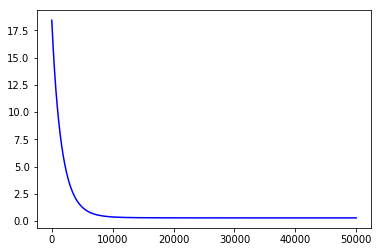

In [54]:
###plot of cost function vs number of iterations
plt.plot(num_of_iter, cost_list,color='blue')
plt.show()